In [194]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
%matplotlib inline

def k(r, b):
    
    if b > 1:
        x = b
        y = 1
        z = r
    else:
        x = 1
        y = b
        z = r
        if r > b:
            y = r
            z = b
    delta = np.sqrt((x + (y + z)) * (z - (x - y)) * (z + (x - y)) * (x + (y - z)))
    
    ks = np.arctan2(delta, (1 - r) * (1 + r) + b * b)
    k = np.arctan2(delta, (r - 1) * (r + 1) + b * b)
    return ks, k

def phi(rp, rm, bp, bpm, cth, sth):
    a = rp
    b = rm
    c = bpm
    if c > b:
        tmp = c
        c = b
        b = tmp
    if b > a:
        tmp = b
        b = a
        a = tmp
    delta = np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))
    pm = np.arctan2(delta, (rm - rp) * (rm + rp) + bpm * bpm) 
    pp = np.arctan2(delta, (rp - rm) * (rp + rm) + bpm * bpm)
    thetam = np.arctan2(bp * sth, bpm - bp * cth)
    theta = np.arctan2(sth, cth)
    pm1 = thetam + pm
    pm2 = thetam - pm
    pp1 = theta + pp
    pp2 = theta - pp
    return pm1, pm2, pp1, pp2

def case(rp, rm, bp, bpm, theta):
    cth = np.cos(theta)
    sth = np.sin(theta)
    bm = np.sqrt((bp - bpm)**2 + 2 * bp * bpm * (1 - cth))
    
    if bpm > rp + rm:
        return 'No overlap'
    if (rp - bp > 1) or (rm - bm) > 1:
        return 'R'
    elif bp > 1 + rp:
        if bm > 1 + rm:
            return 'A'
        else:
            return 'B'
    elif bm > 1 + rm:
        return 'C'
    elif bp + rp <= 1:
        if bm + rm <= 1:
            if bpm + rm < rp:
                return 'D'
            else:
                return 'E'
        else:
            return 'F'
    elif bm + rm <= 1:
        if bpm + rm < rp:
            return 'G'
        else:
            return 'H'
    elif bpm + rm < rp:
        return 'I'
    else:
        
        kps, kp = k(rp, bp)
        kms, km = k(rm, bm)
        
        a = bm
        b = bp
        c = bpm
        if b > a:
            tmp = b
            b = a
            a = tmp
        if c > b:
            tmp = c
            c = b
            b = tmp
        if b > a:
            tmp = b
            b = a
            a = tmp
        delta = (a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c))
        if delta < 0:
            delta = 0
        else:
            delta = np.sqrt(delta)
        theta_pm = np.arctan2(delta, (bm - bpm) * (bm + bpm) + bp * bp)
        
        phim_plus, phim_minus, phip_plus, phip_minus = phi(rp, rm, bp, bpm, cth, sth)
        
        if theta_pm + kms <= kps:
            print(np.abs(phip_minus), kp)
            if np.abs(phip_minus) > kp:
                return 'J'
            else:
                return 'K'
        else:
            print(theta_pm, kps, kms)
            if theta_pm + kps <= kms:
                if bp - rp <= bm - rm:
                    return 'L'
                else:
                    return 'M'
            else:
                
                d1 = rp * rp + bp * bp - 2 * rp * bp * np.cos(phip_plus)
                d2 = rp * rp + bp * bp - 2 * rp * bp * np.cos(phip_minus)
                
                if (d1 > 1) & (d2 > 1):
                    if phip_plus * phip_minus < 0:
                        return 'Q'
                    return 'N'
                if (d1 <= 1) & (d2 <= 1):
                    return 'O'
                else:
                    return 'P'
    
def draw(rp, rm, bp, bpm, theta):
    cth = np.cos(theta)
    sth = np.sin(theta)
    th = np.linspace(0, 2*np.pi, 1000)
    bm = np.sqrt((bp - bpm)**2 + 2 * bp * bpm * (1 - cth))
    
    plt.figure(figsize=(10, 10))
    
    star = plt.Circle((0, 0), 1, color='#ffae36', alpha=0.75)
    star_outline = plt.Circle((0, 0), 1, color=colorConverter.to_rgba('w', alpha=0.0), ec='k')
    
    planet = plt.Circle((bp, 0.0), rp, color=colorConverter.to_rgba('r', alpha=0.5), ec='k')
    planet_base = plt.Circle((bp, 0.0), rp, color='w')
    moon = plt.Circle((bp - bpm * cth, bpm * sth), rm, color=colorConverter.to_rgba('b', alpha=0.5), ec='k')
    moon_base = plt.Circle((bp - bpm * cth, bpm * sth), rm, color='w')
    
    axs = plt.gca()
    axs.add_patch(star)
    axs.add_patch(planet_base)
    axs.add_patch(moon_base)
    axs.add_patch(star_outline)
    
    axs.add_patch(planet)
    axs.add_patch(moon)
    
    axs.annotate(case(rp, rm, bp, bpm, theta), xy = (0.1, 0.9), xycoords='axes fraction', fontsize=30)
    axs.annotate("{0}\n{1}\n{2}\n{3}\n{4}".format(rp, rm, bp, bpm, theta), xy = (0.1, 0.7), xycoords='axes fraction', fontsize=15)
    
    plt.xlim(-2.0, 2.0)
    plt.ylim(-2.0, 2.0)

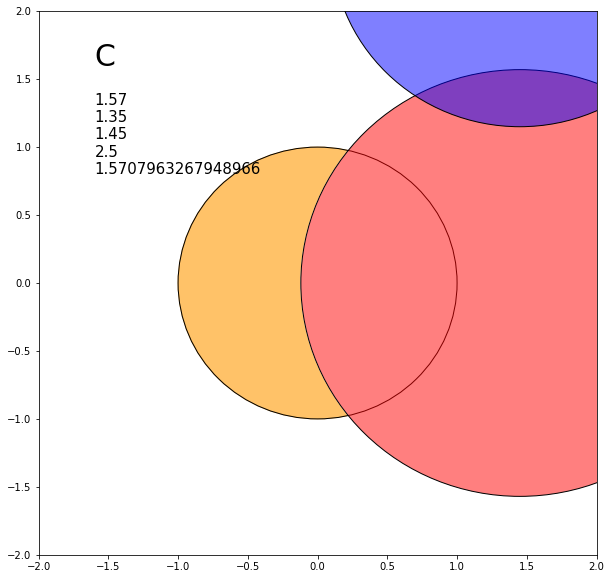

In [209]:
rp = 1.57
rm = 1.35
bp = 1.45
bpm = 2.5
theta = np.pi / 2
draw(rp, rm, bp, bpm, theta)

0.7053605102841576 0.8595508626090554


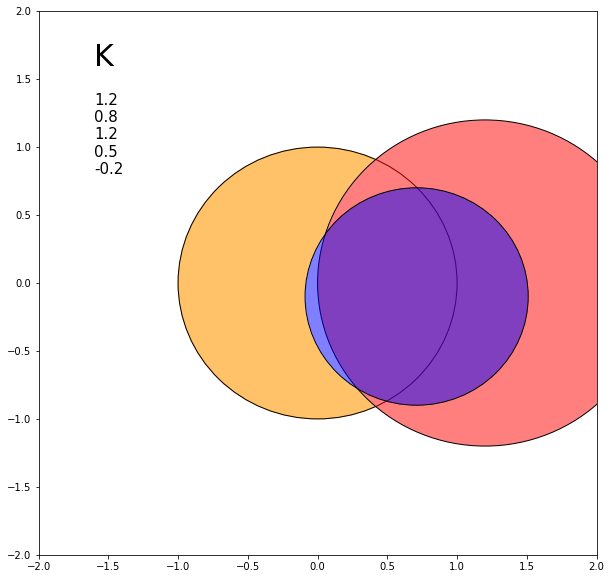

In [196]:
rp = 1.2
rm = 0.8
bp = 1.2
bpm = 0.5
theta = -0.2
draw(rp, rm, bp, bpm, theta)

1.7378251161958644 0.6057223319887517
0.12767197649830064 1.2388140535943886 1.456170386286744
0.9551908000132033 1.041942676668448 0.31115845328247266
1.715524903143205 0.9058854587011382


<ipython-input-194-7e55fd7a65db>:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


0.16364699849713055 0.7837513901721689 0.980630912707051
0.34099519605861134 0.9845100036171678 0.8081093654547084
0.7535140470031148 2.0698076853076297 1.7075750567146342
0.569150781674617 0.4058779302368628
1.6154015782367552 0.8750595128710403
0.05604818597072288 0.3409021059944418 0.36975032013358444
0.04357288251893415 0.5036670467160812 0.7226496465534095
0.40804889738554373 1.1512976755890574 0.9101374317360523
2.902228433775072 1.0175115762932008
0.4270407882210354 0.5369813678372705 0.33001343753087614
1.1787137960504732 0.780196889556547 0.6477816859434405
0.2765140108206621 1.0454077802376998 0.8142584092973021
3.091329204204488 0.5084052527217378
2.6747286192403354 0.7666572534622932
0.6768867868481302 0.6662294668884319 0.7065666846909698


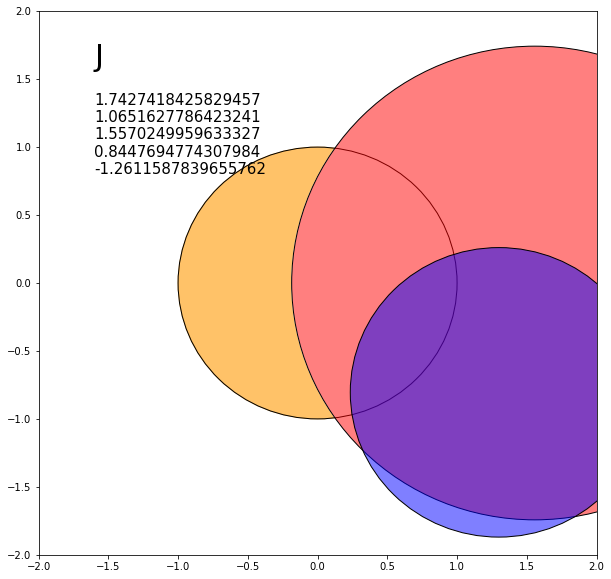

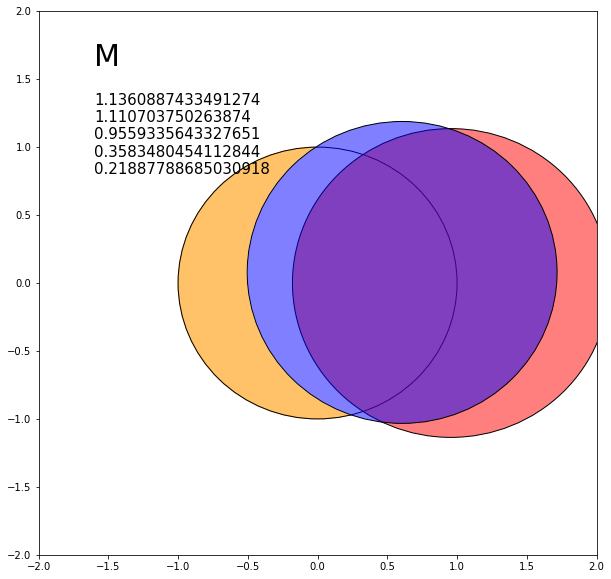

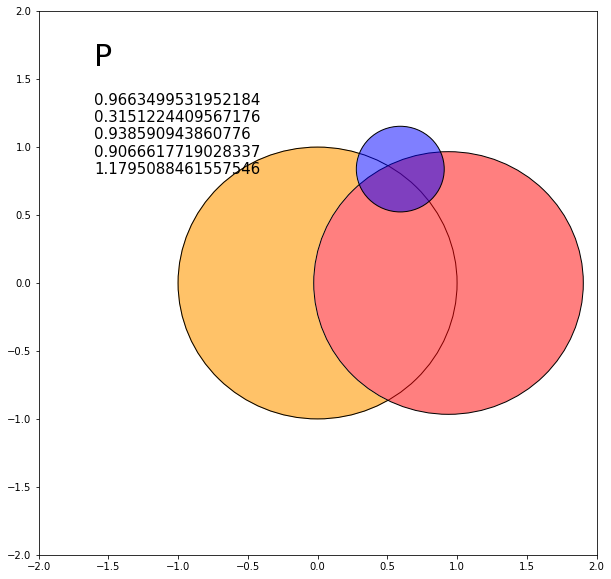

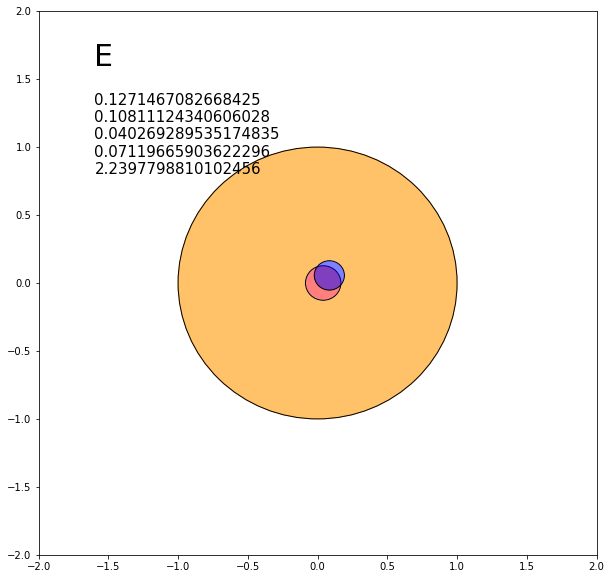

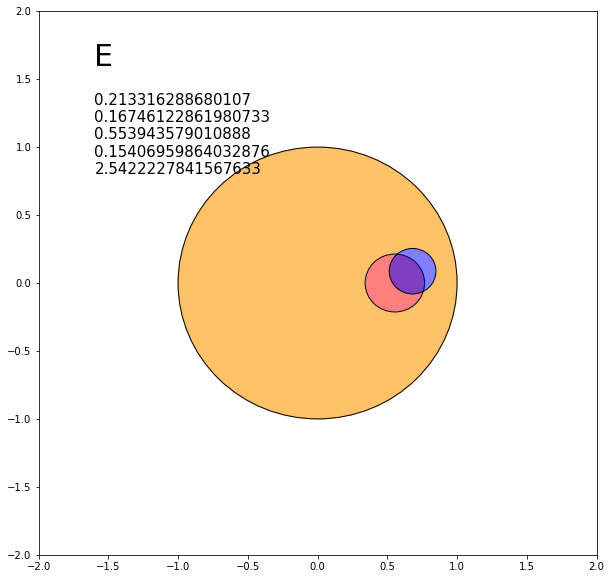

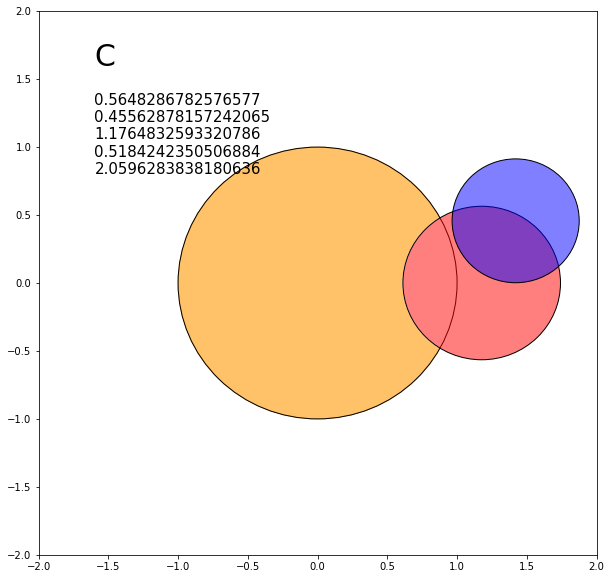

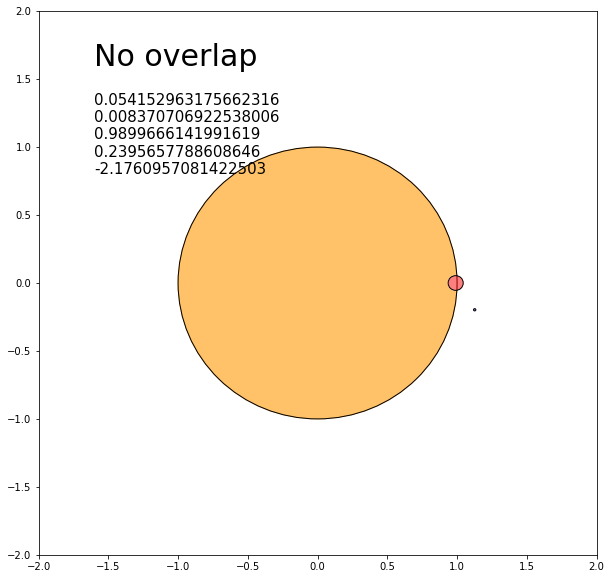

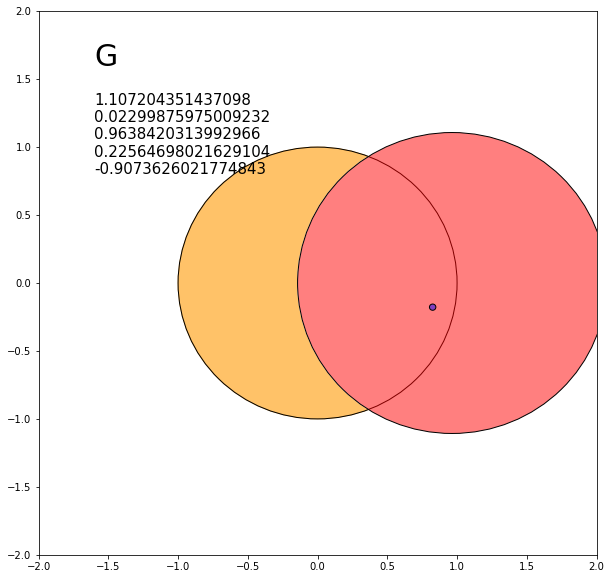

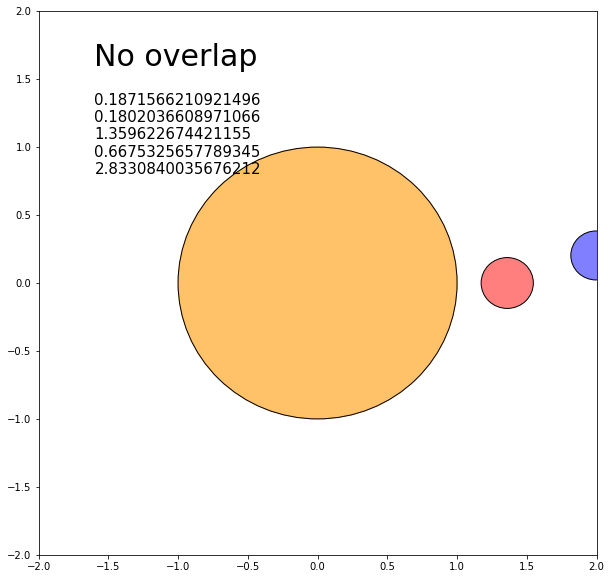

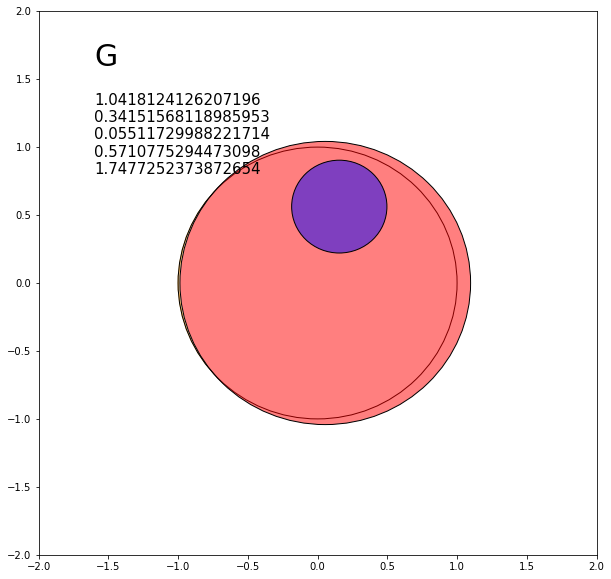

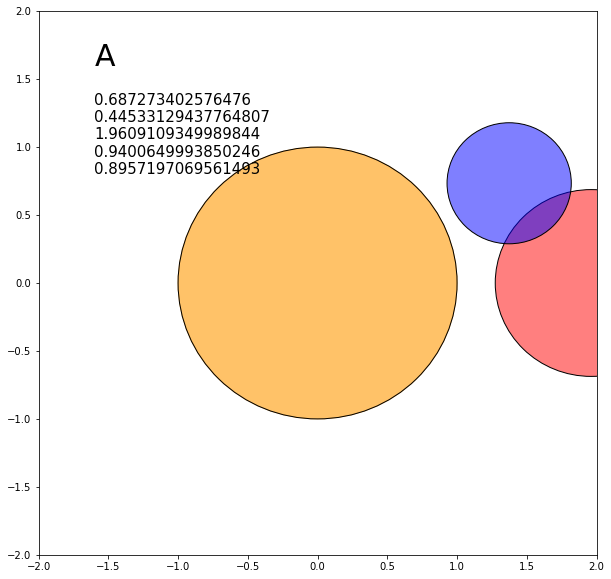

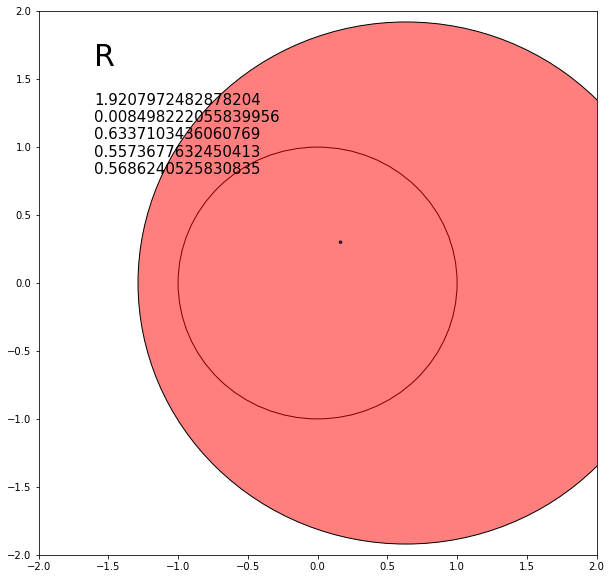

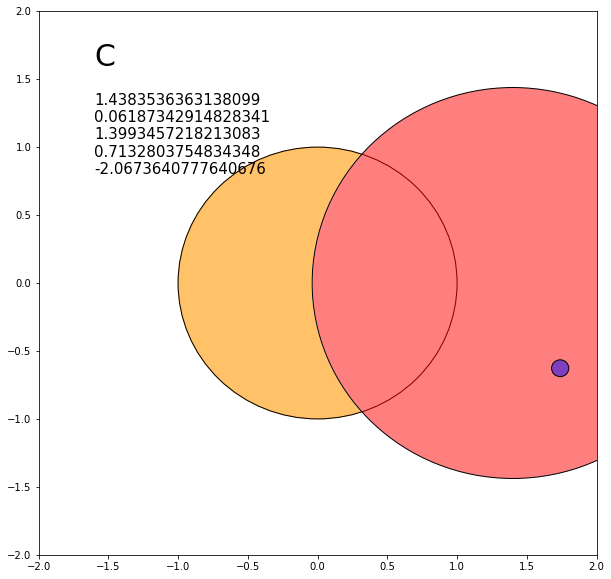

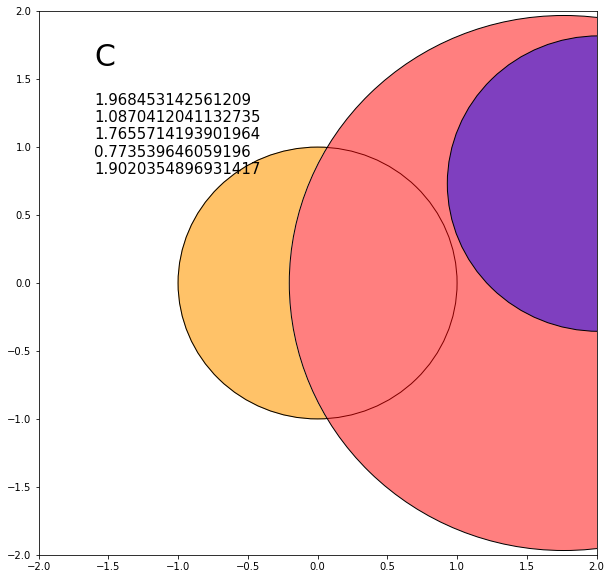

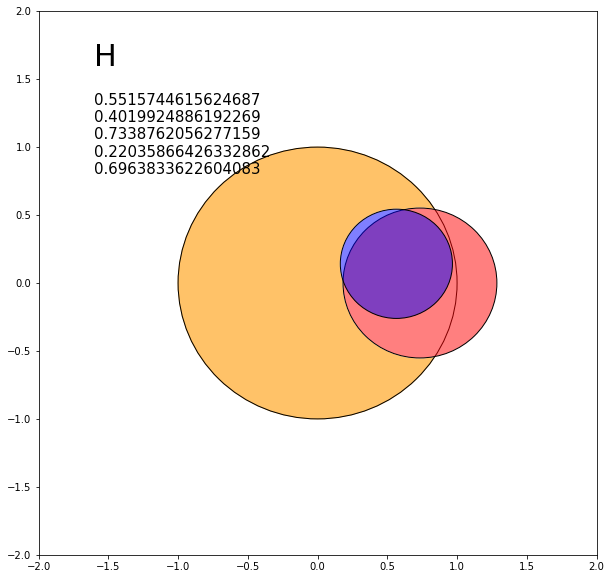

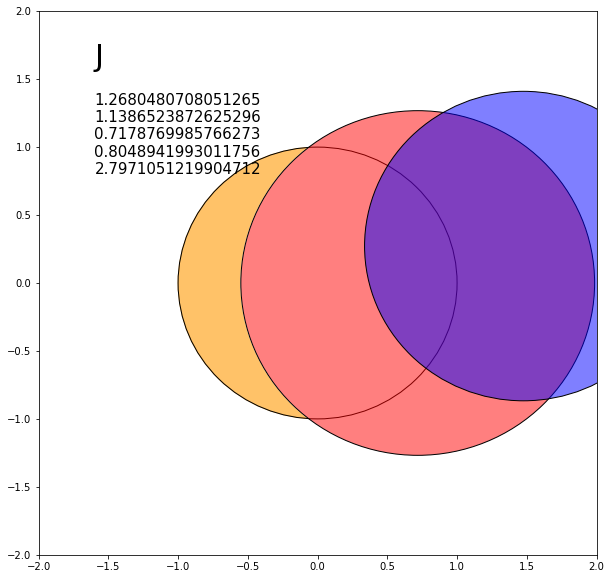

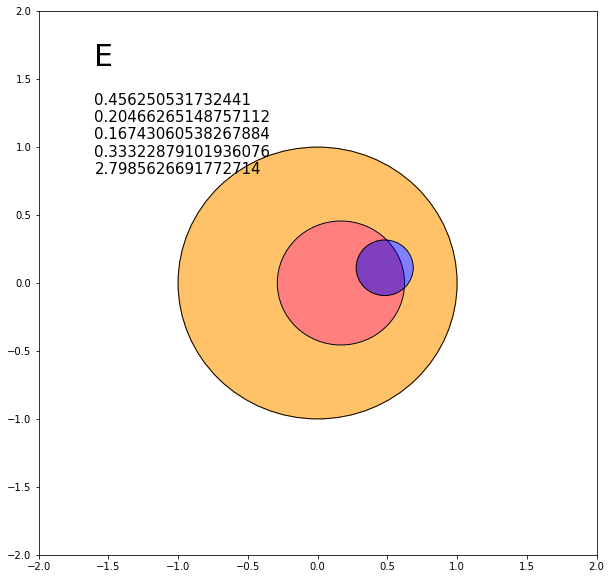

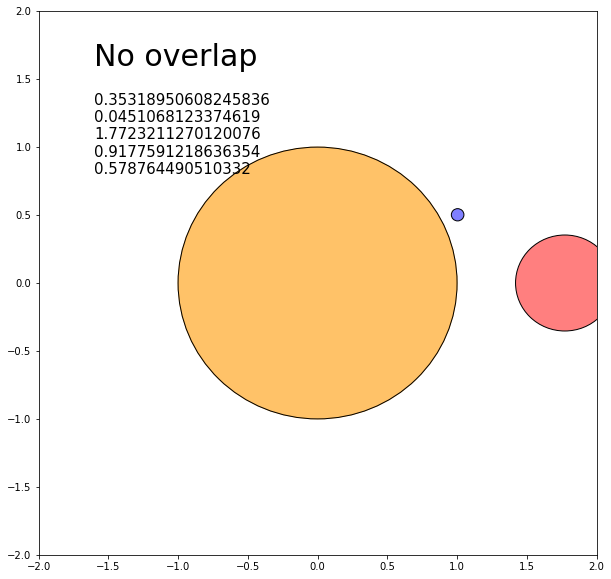

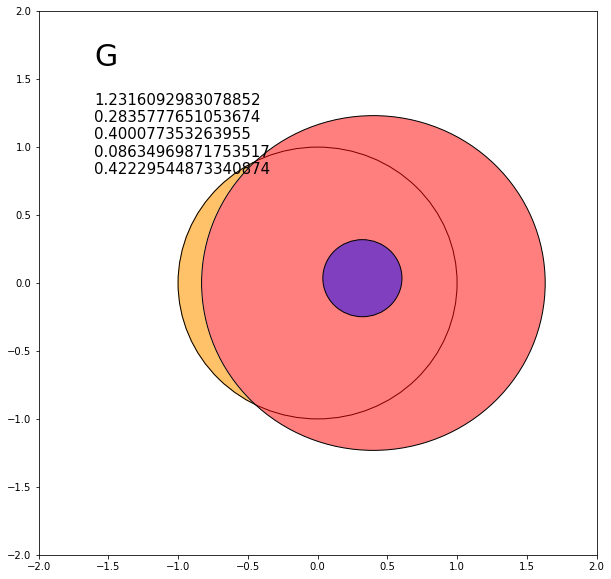

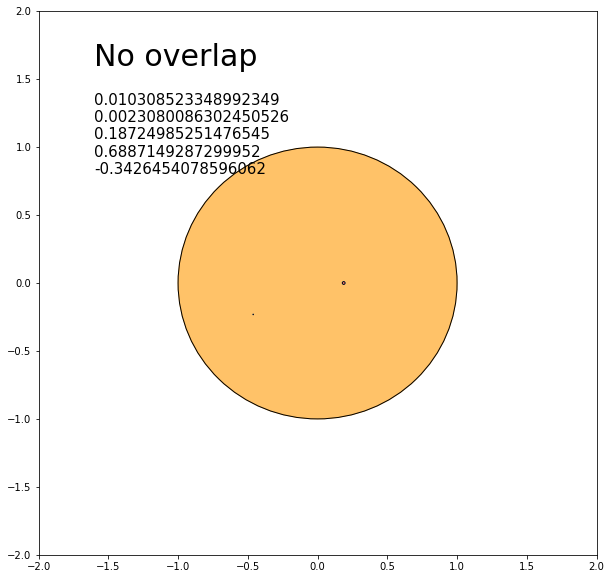

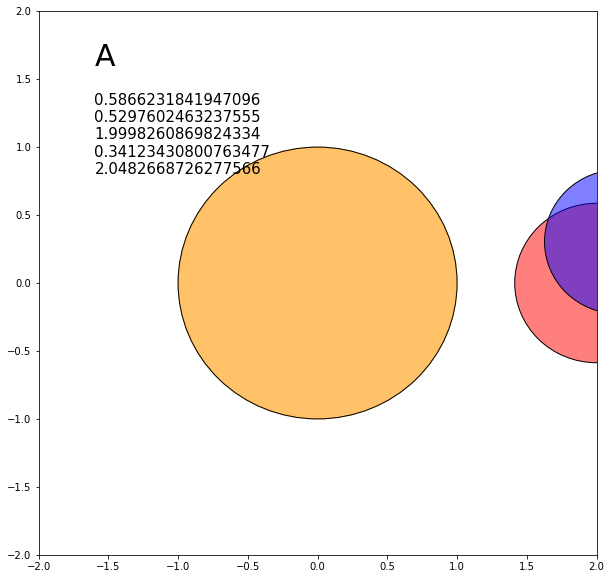

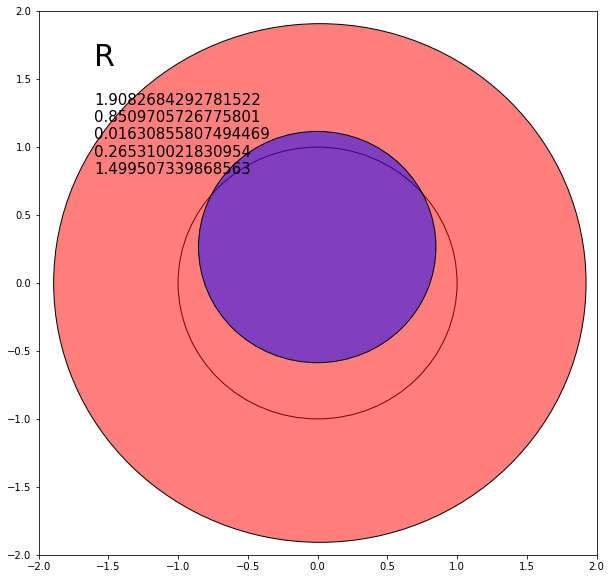

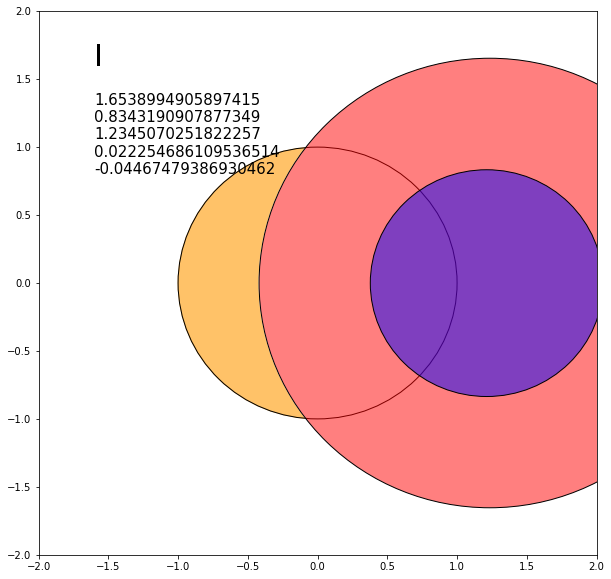

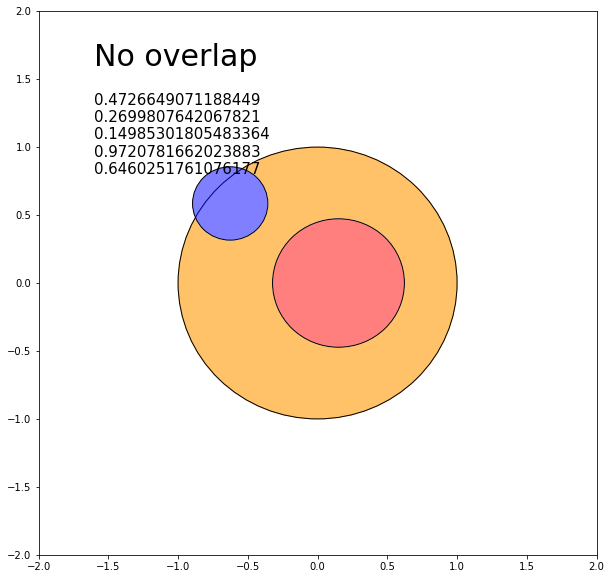

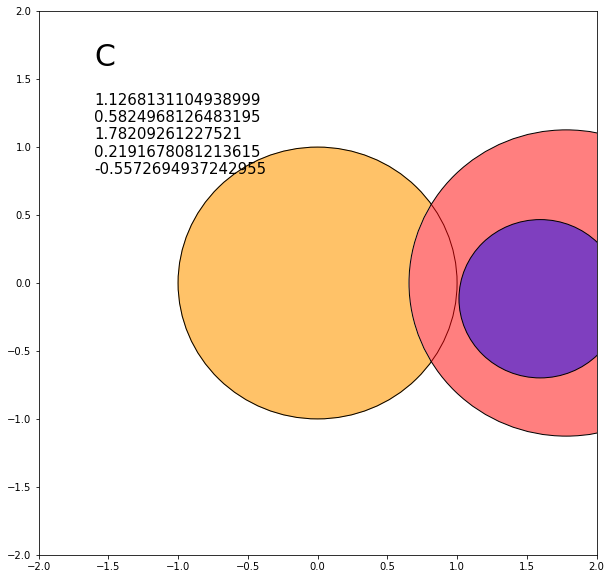

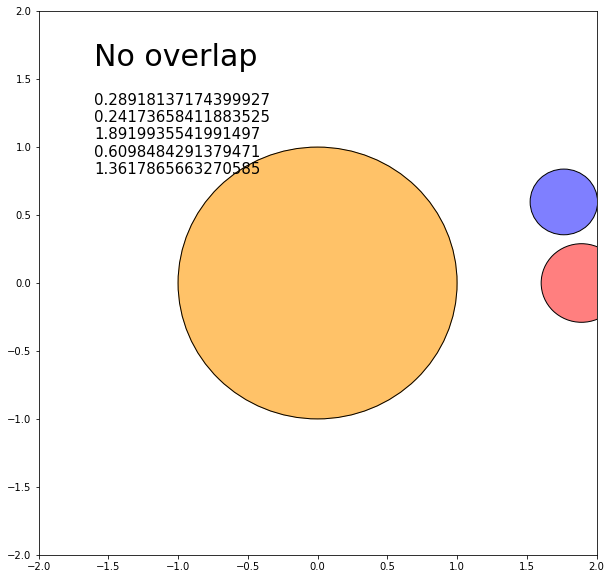

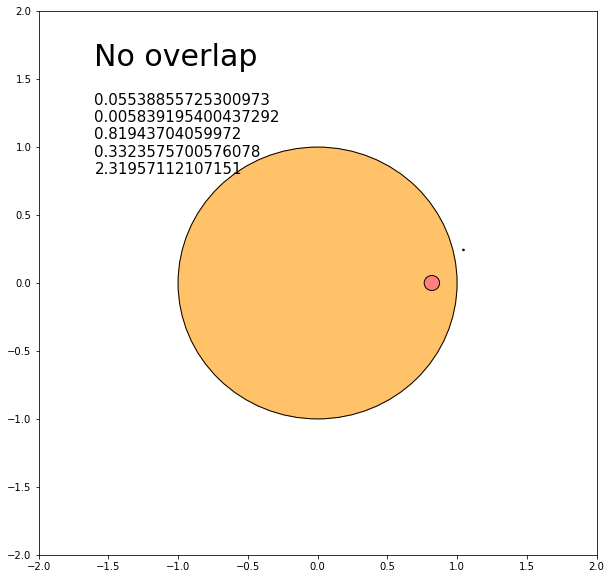

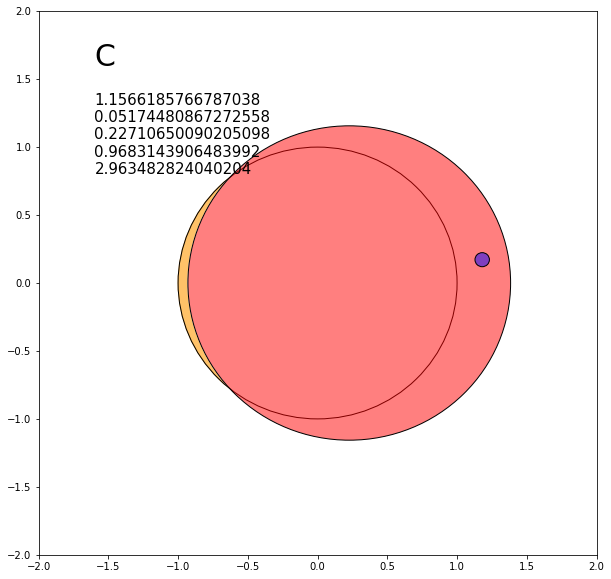

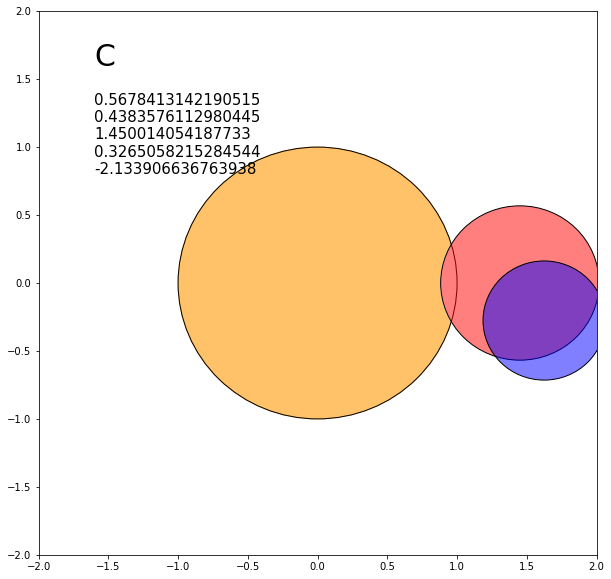

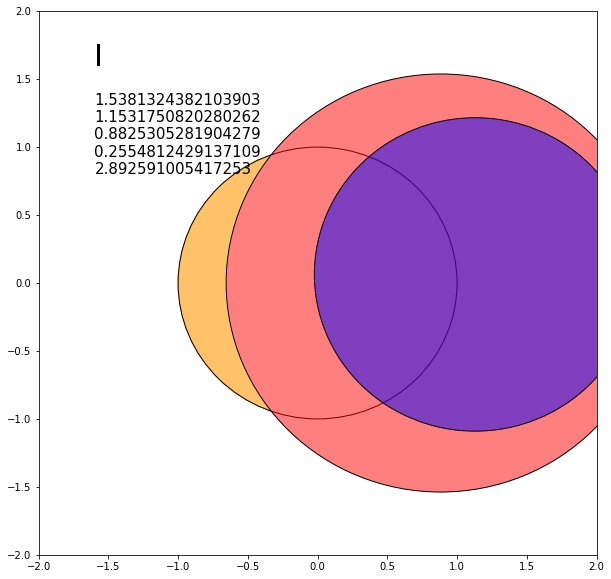

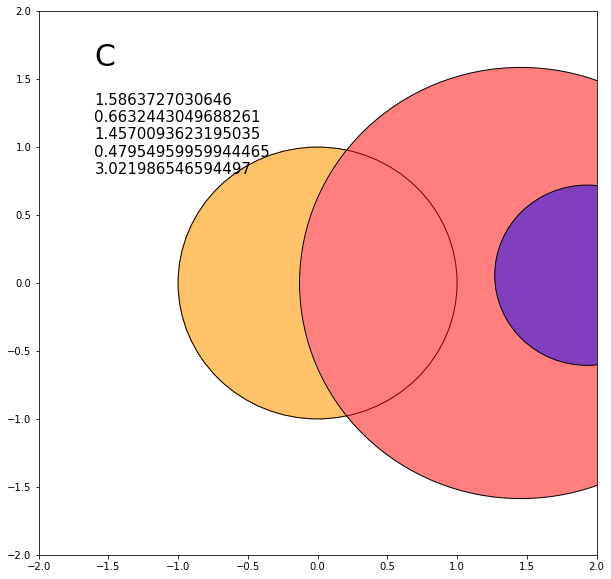

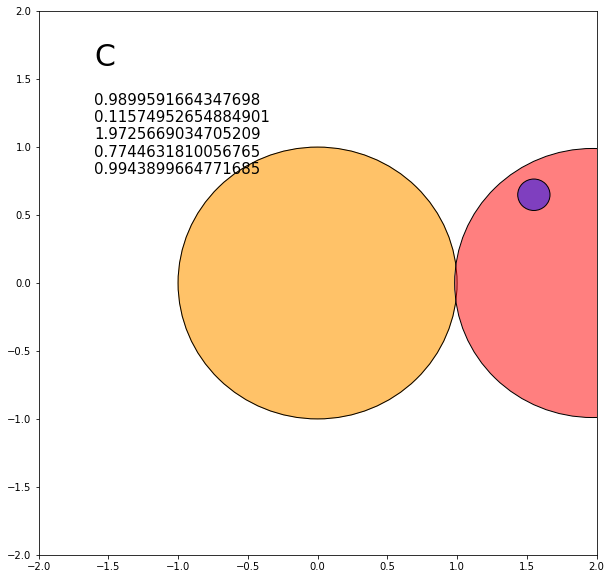

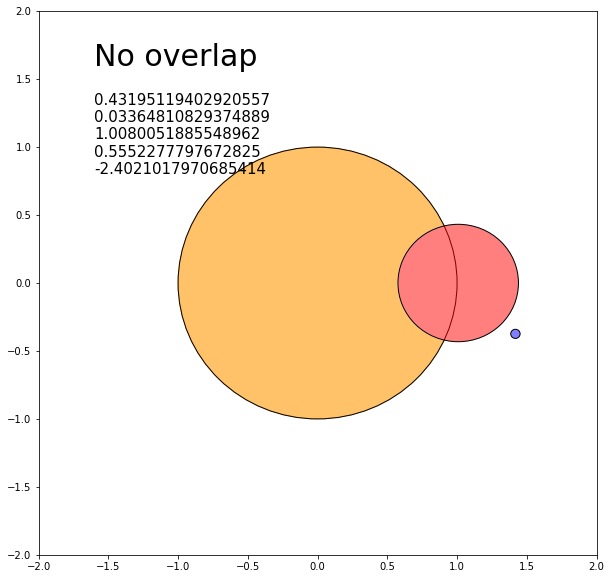

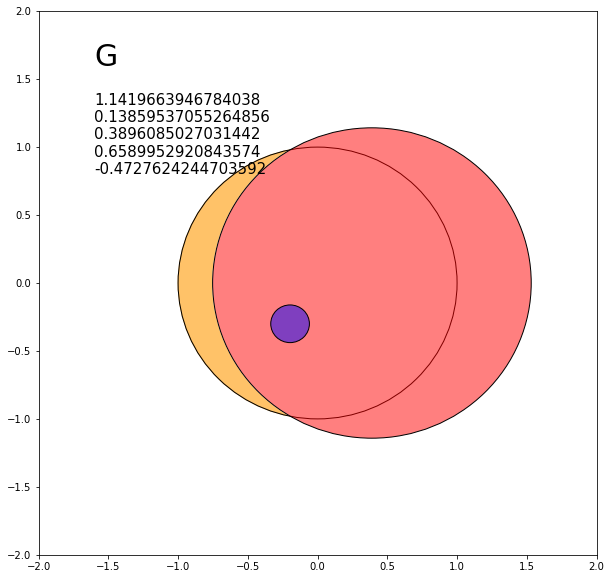

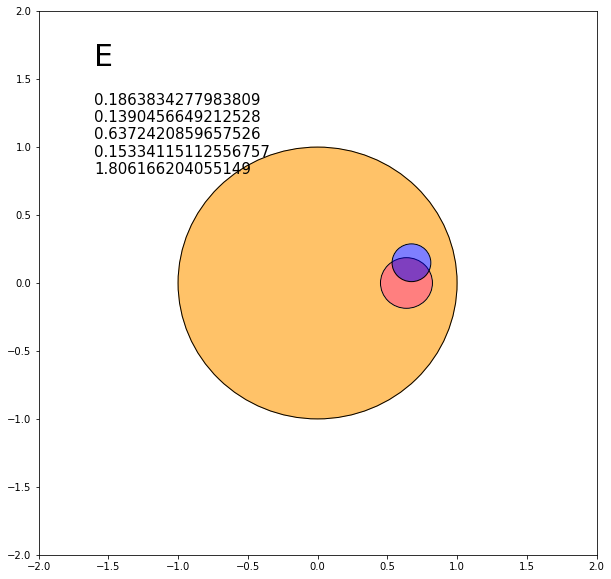

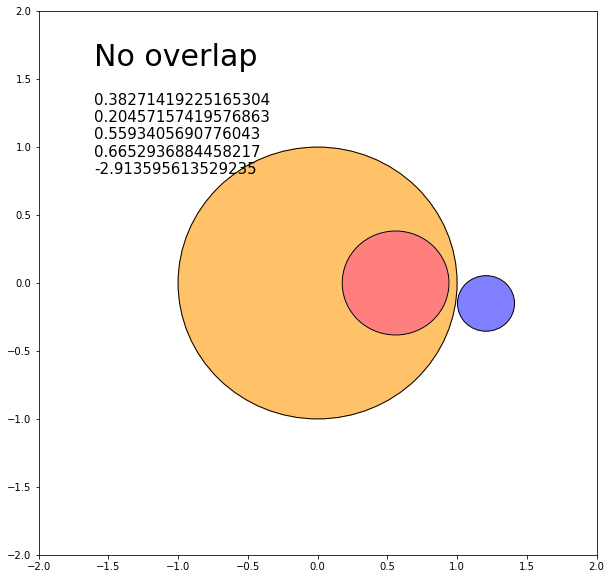

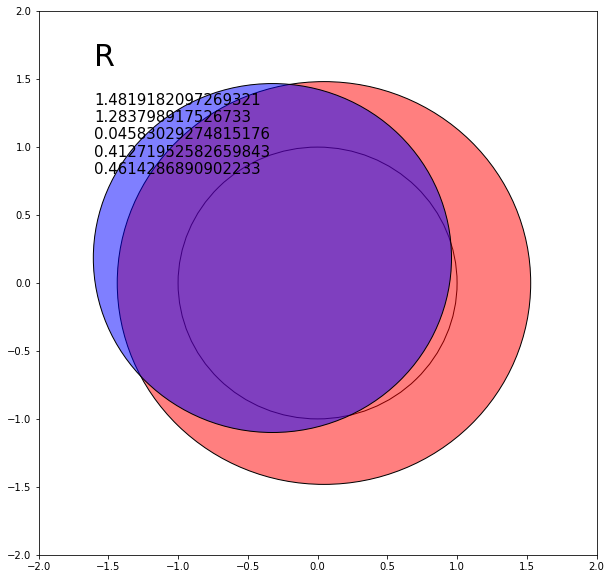

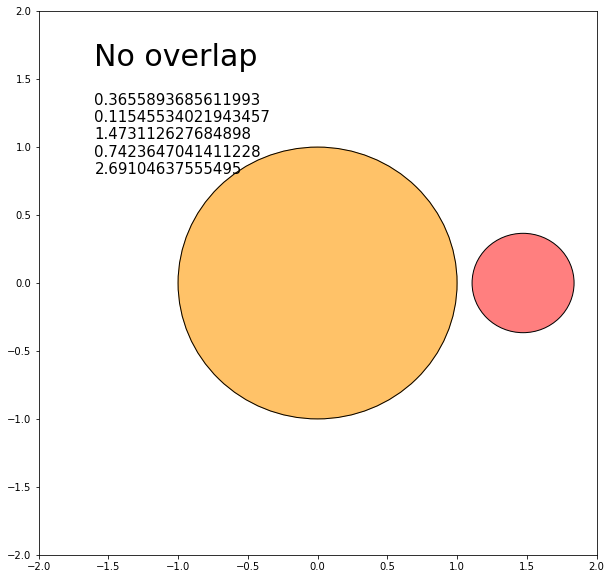

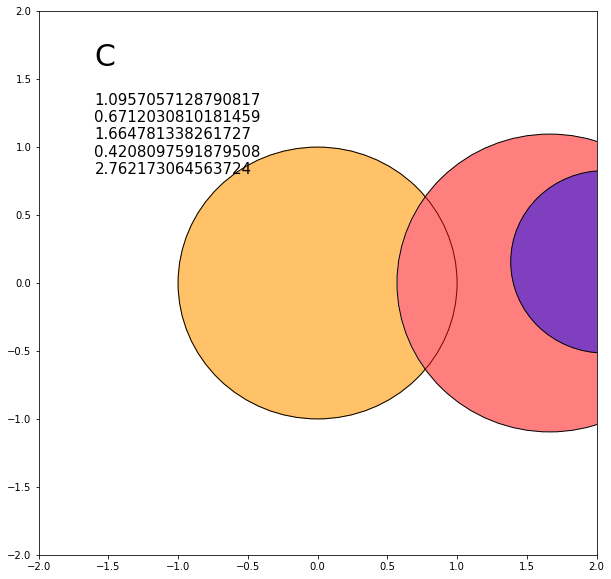

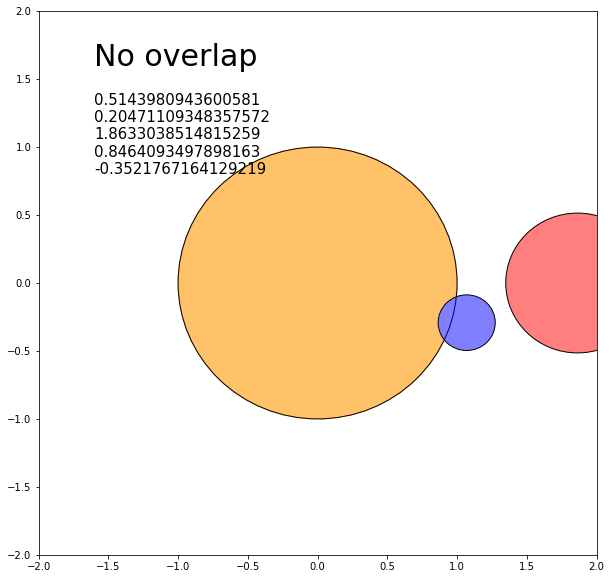

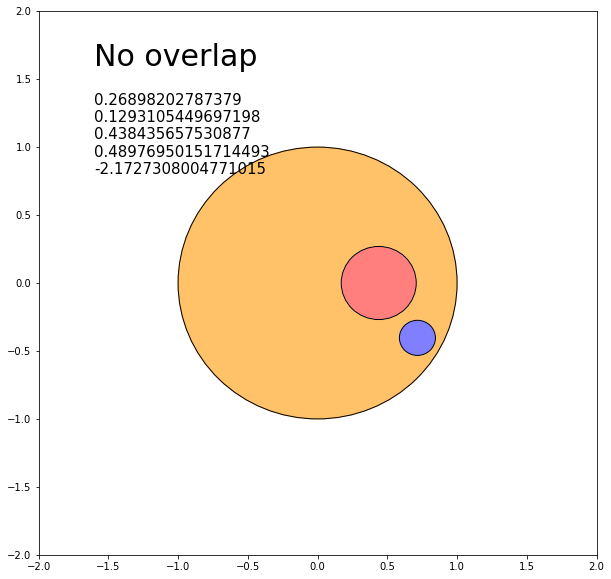

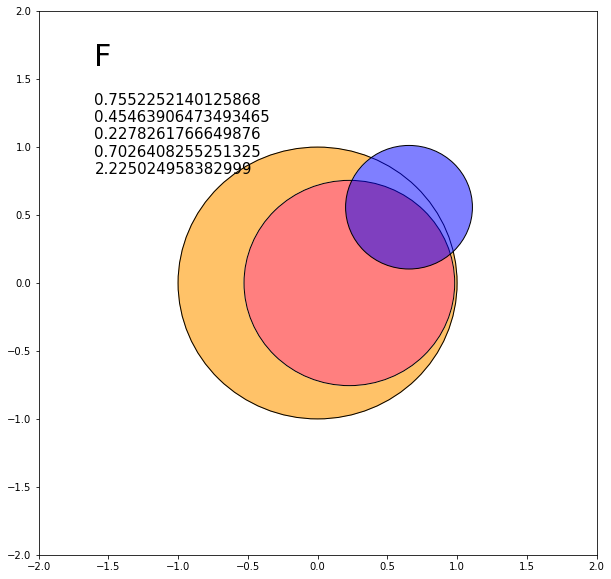

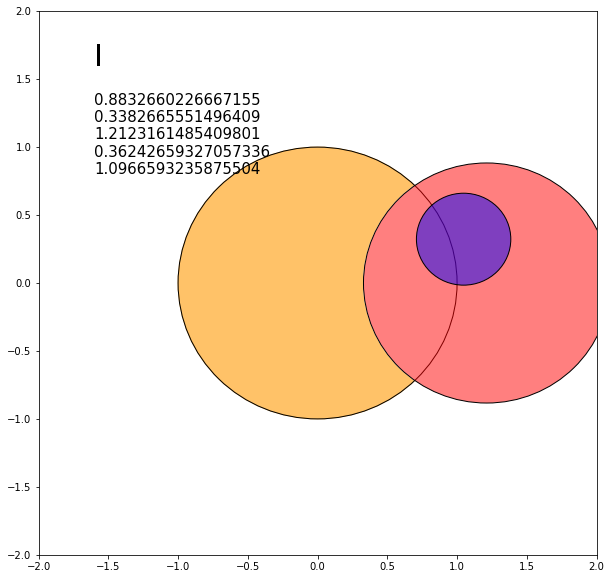

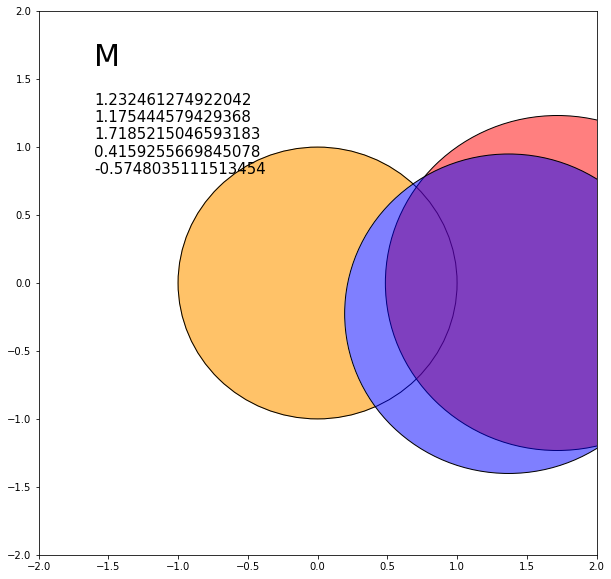

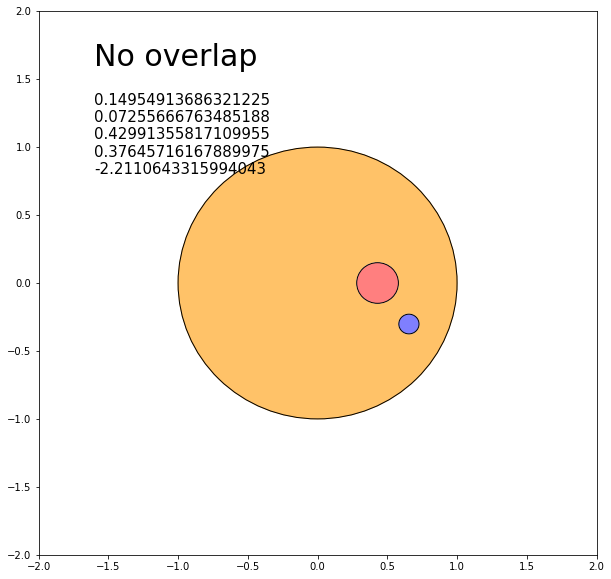

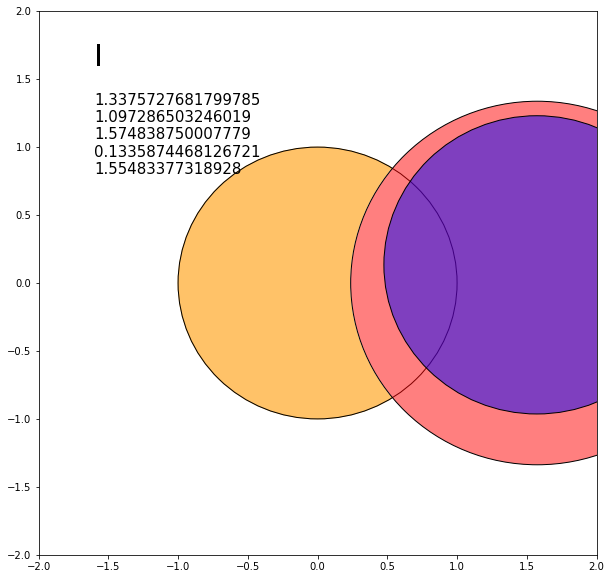

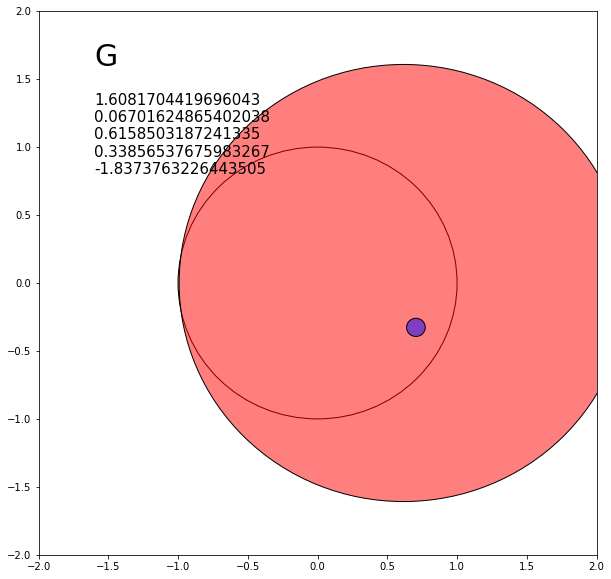

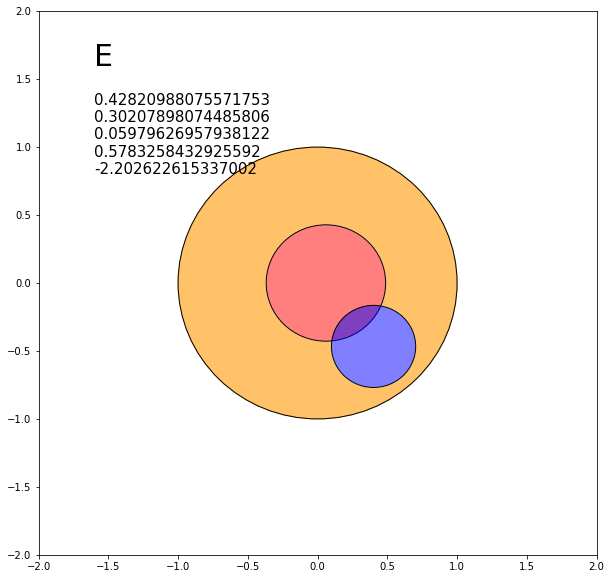

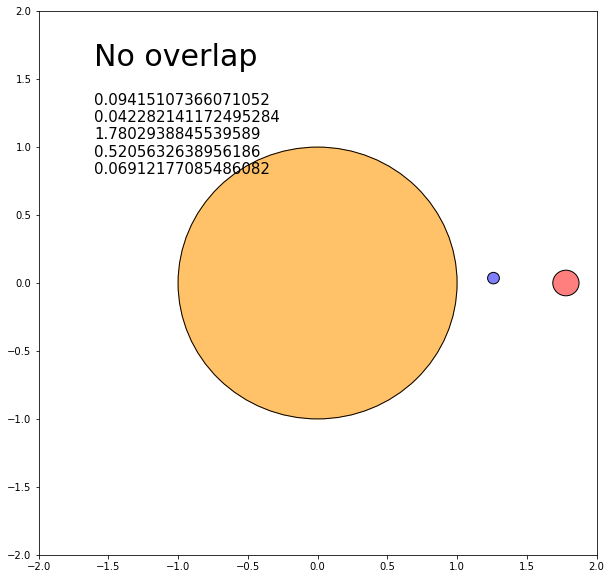

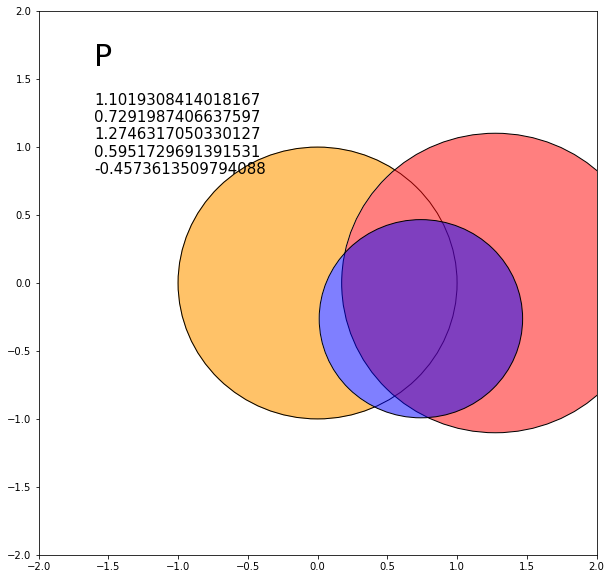

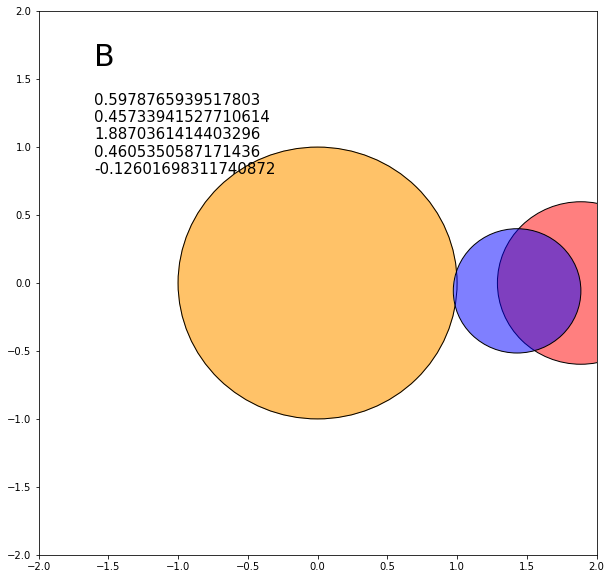

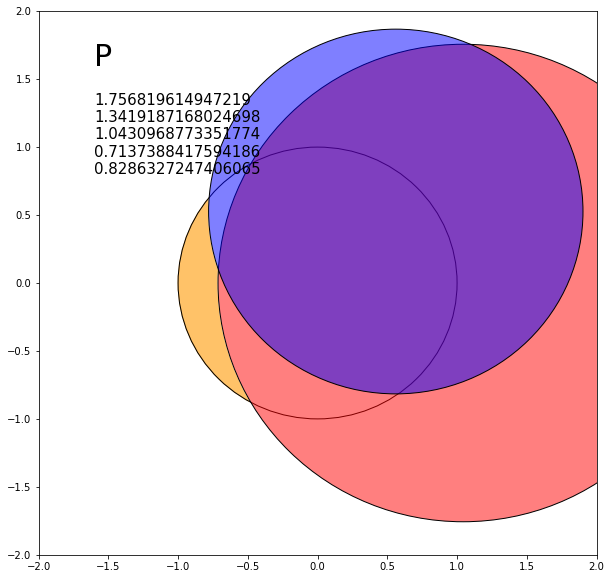

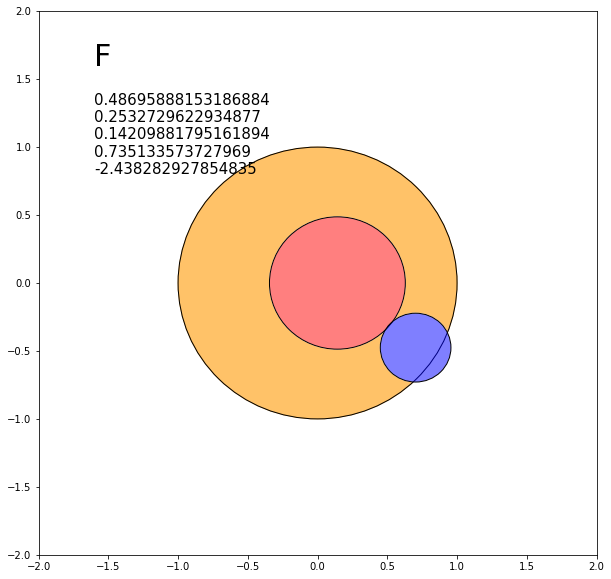

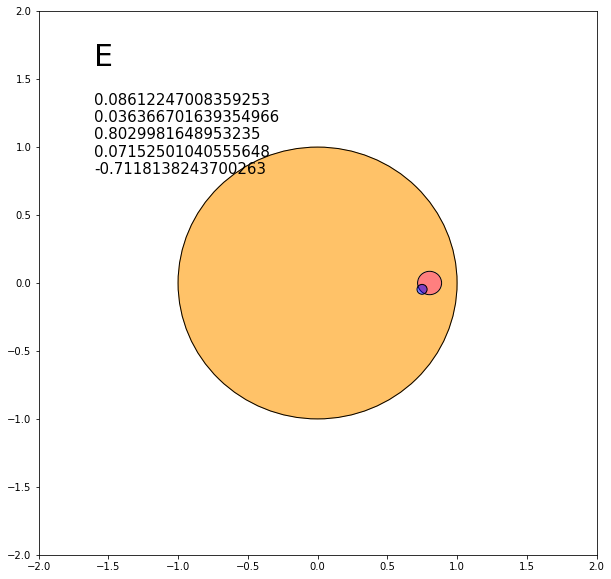

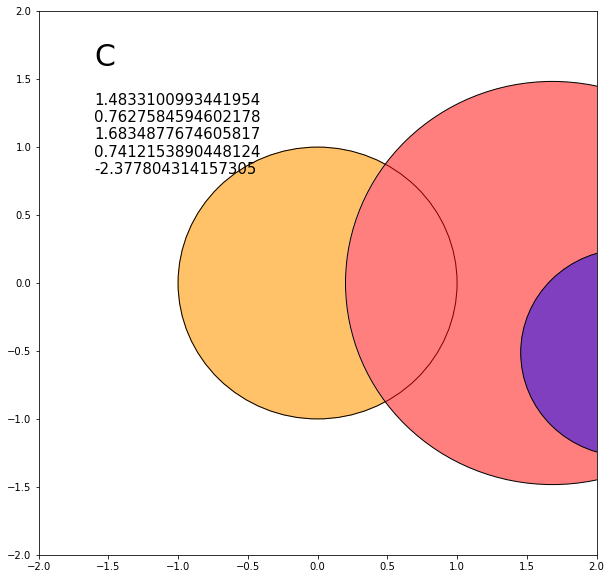

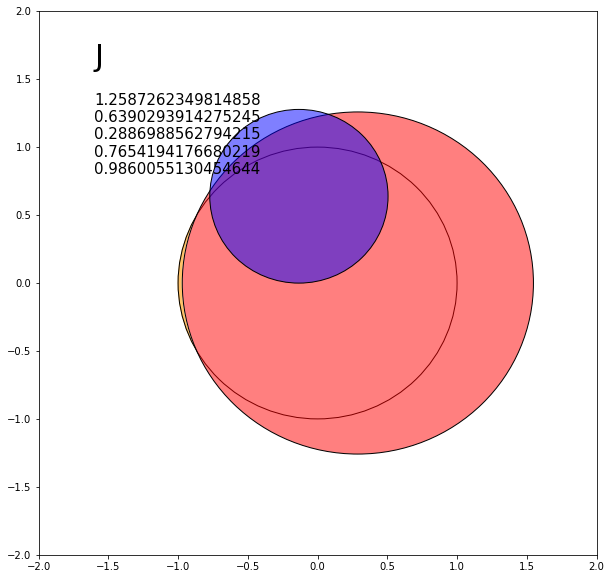

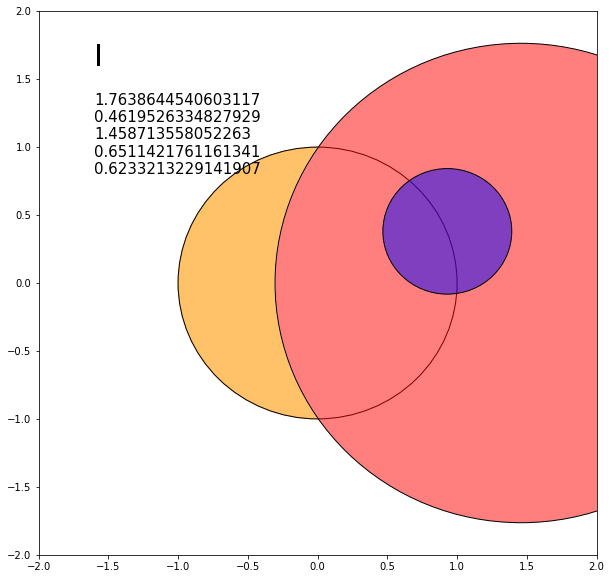

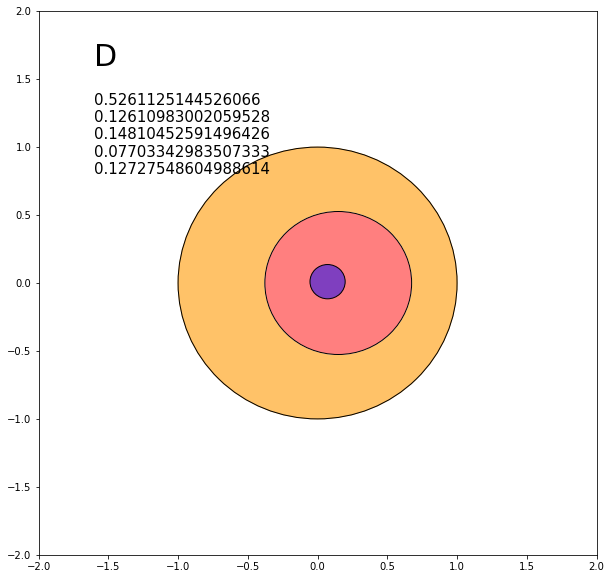

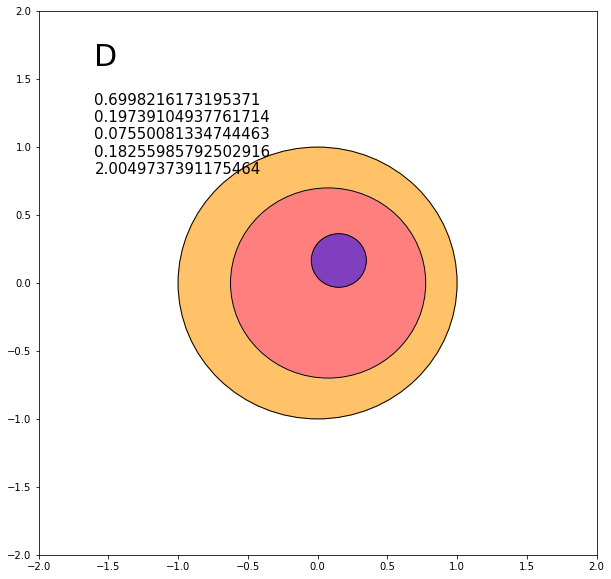

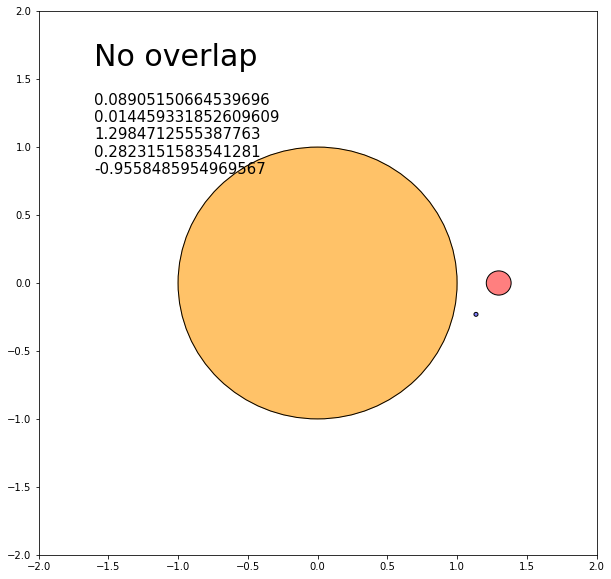

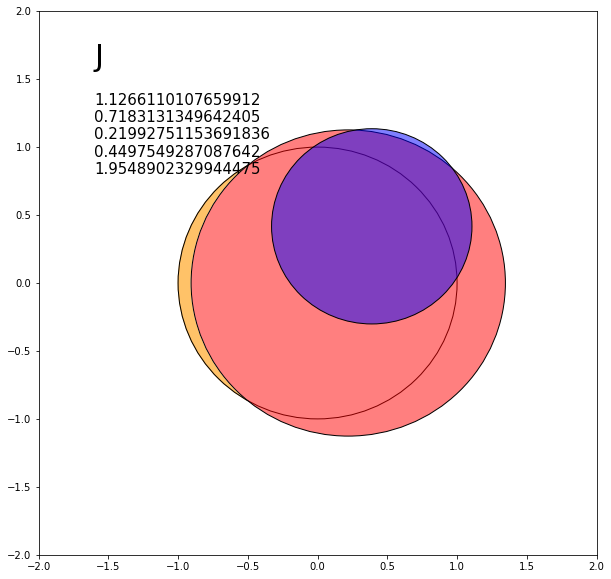

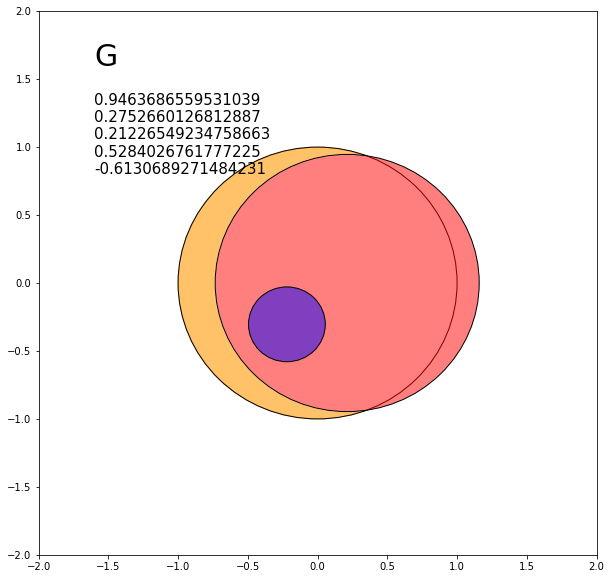

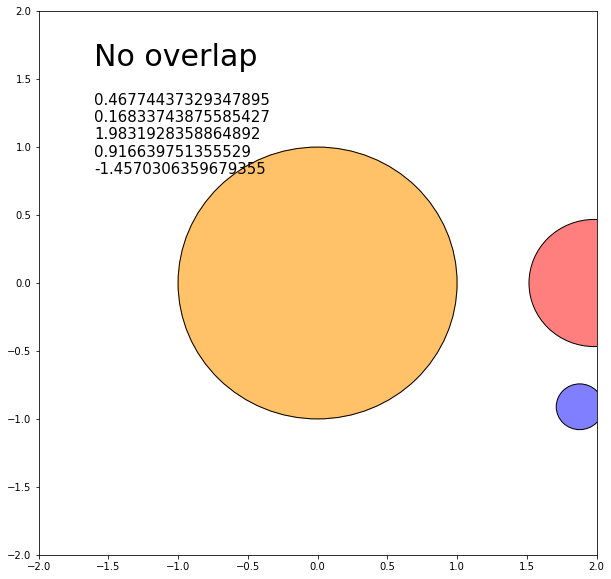

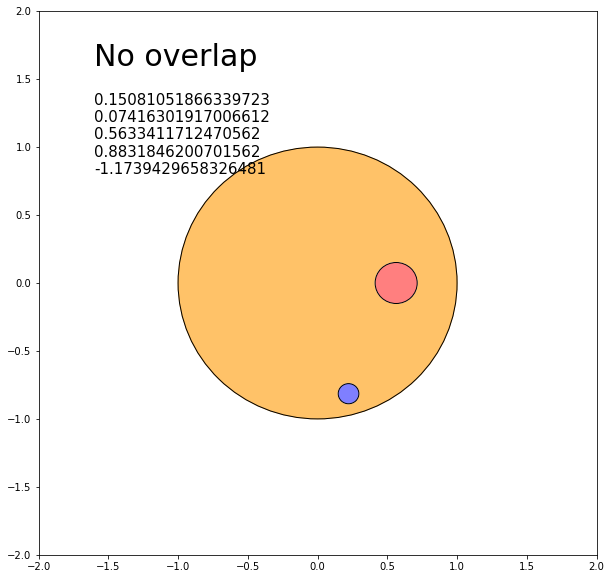

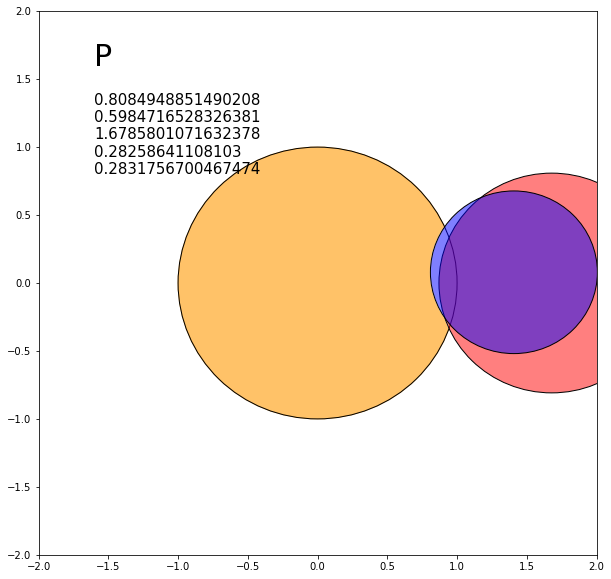

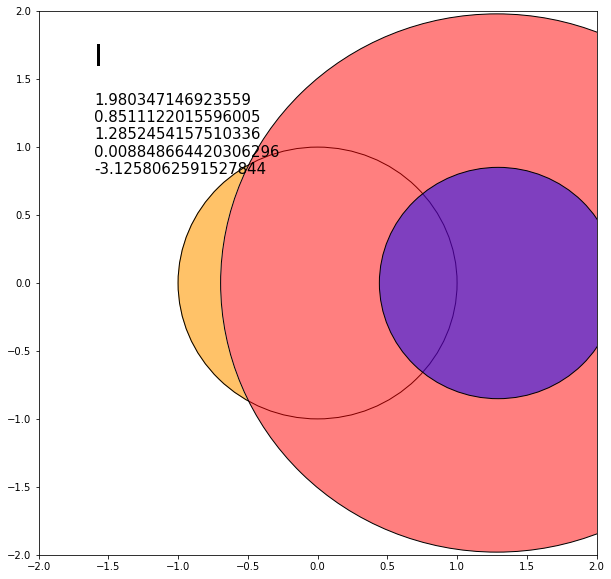

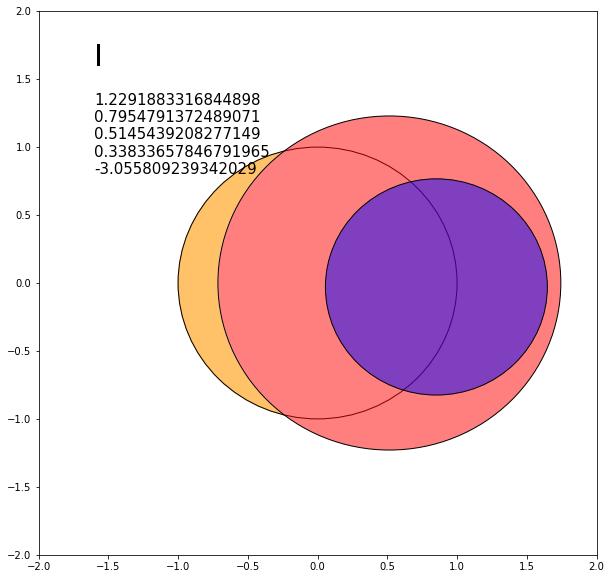

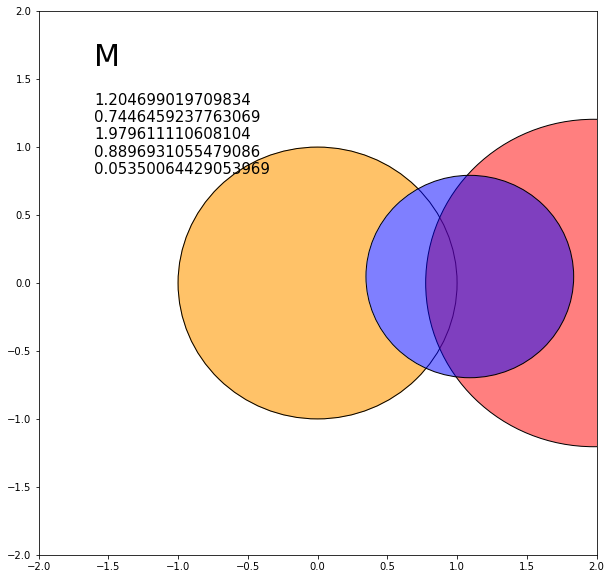

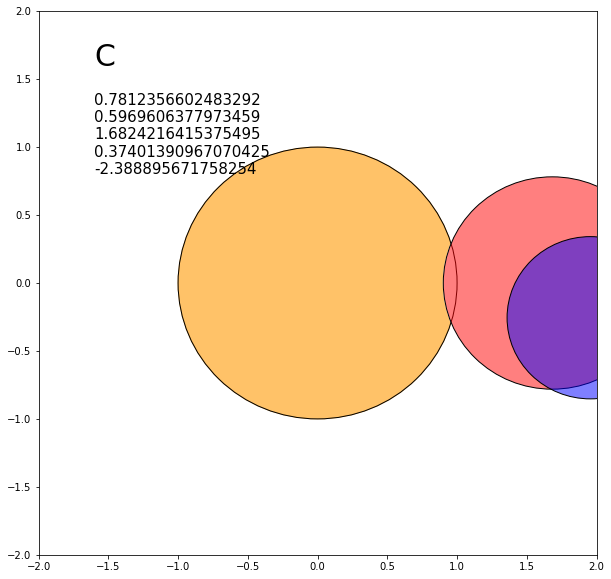

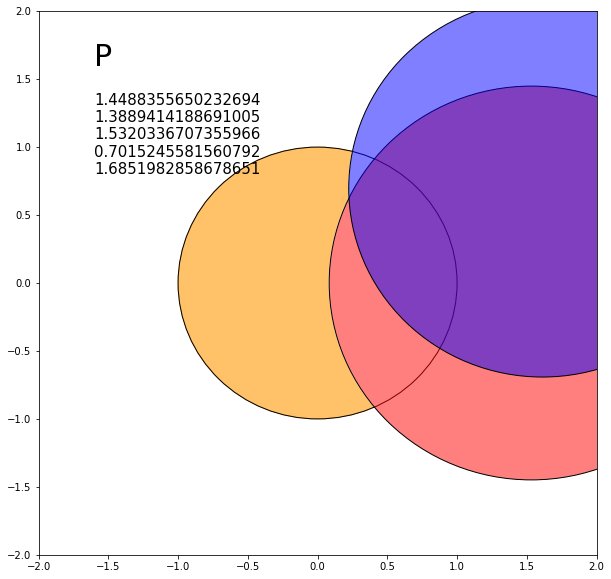

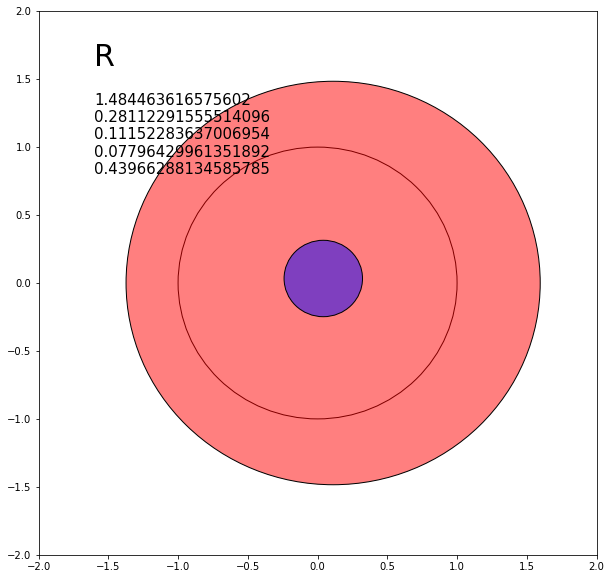

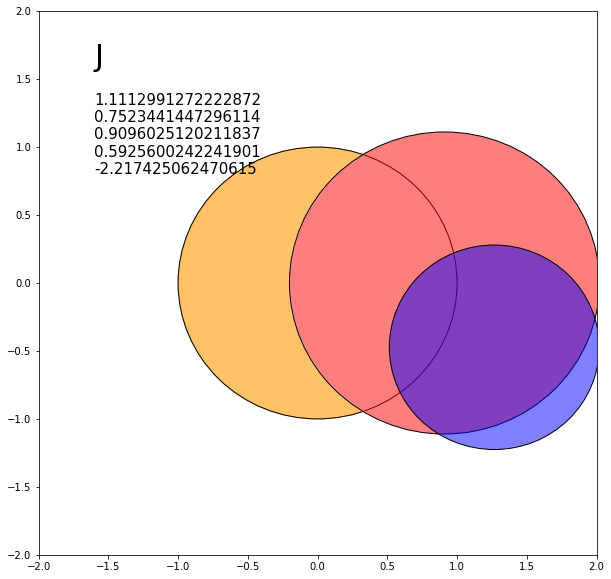

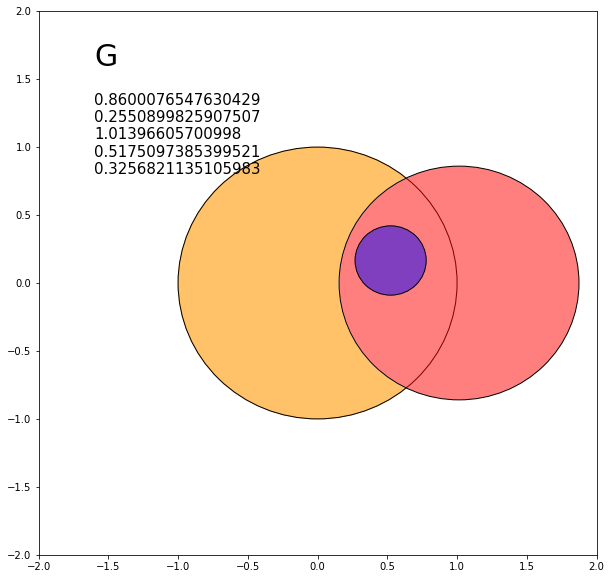

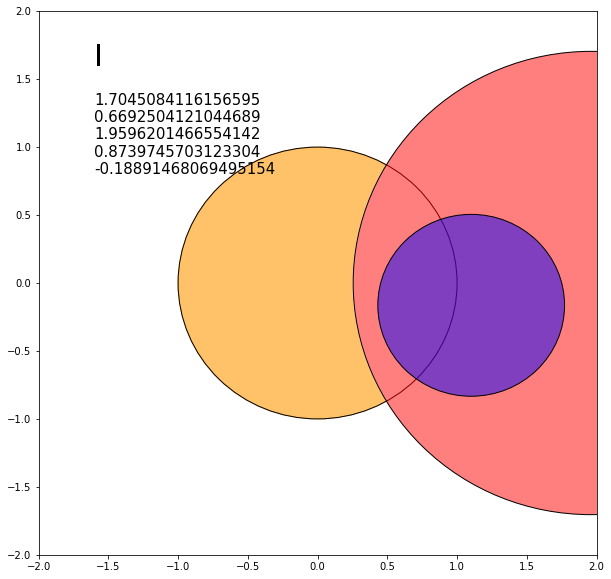

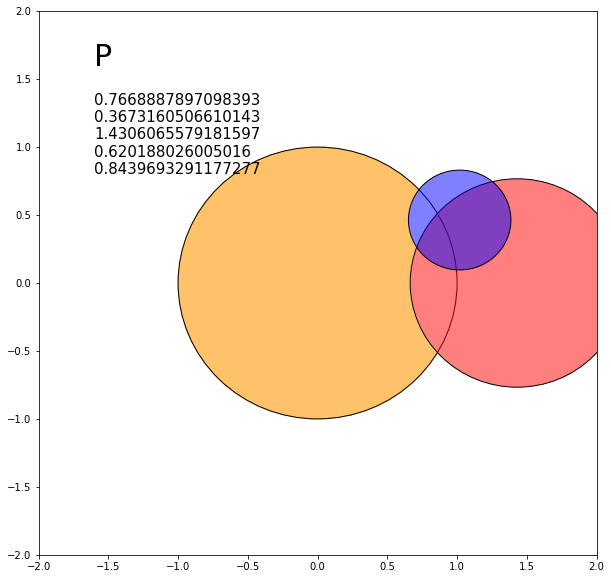

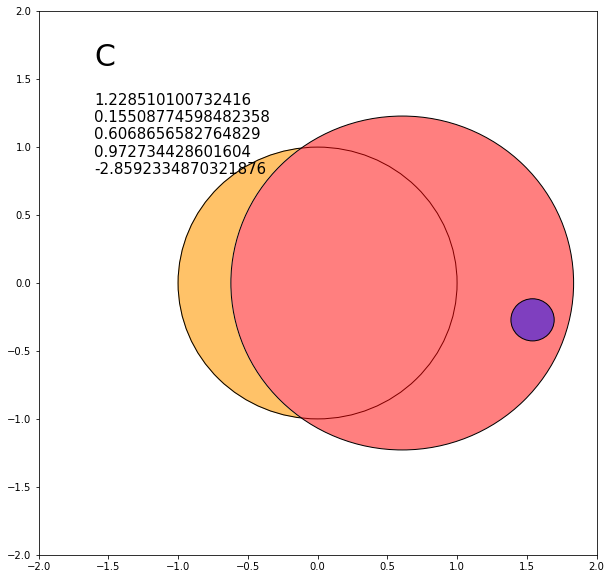

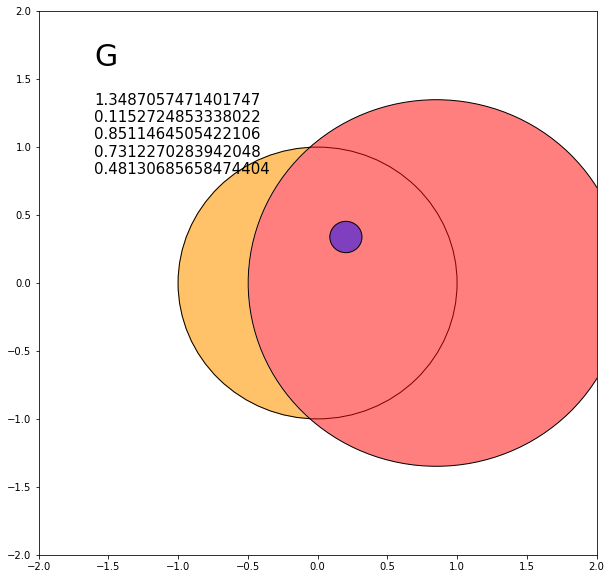

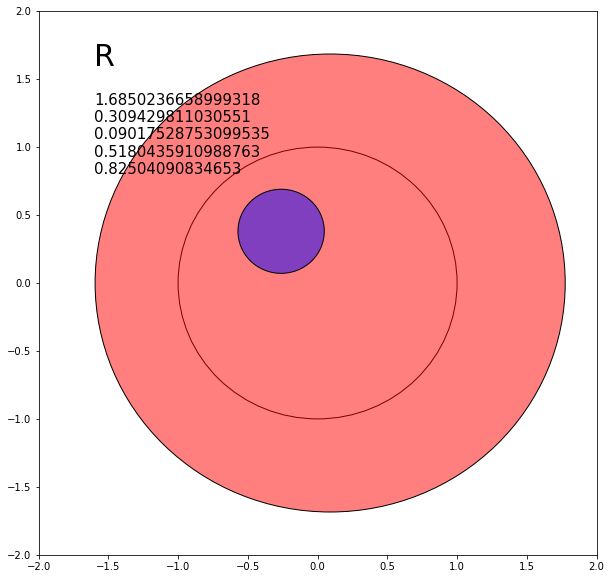

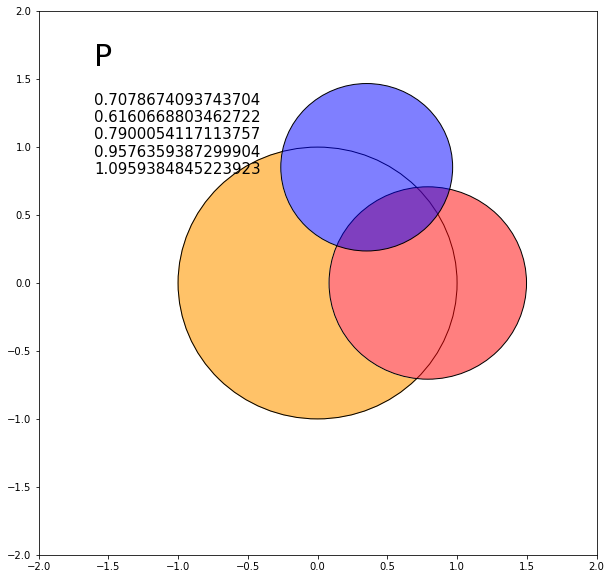

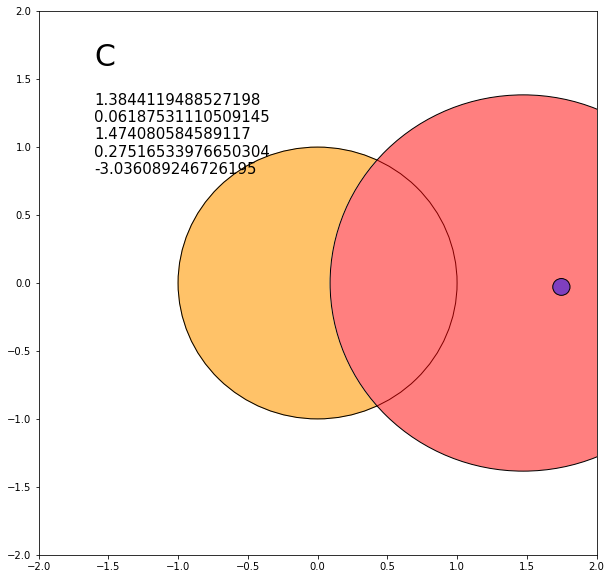

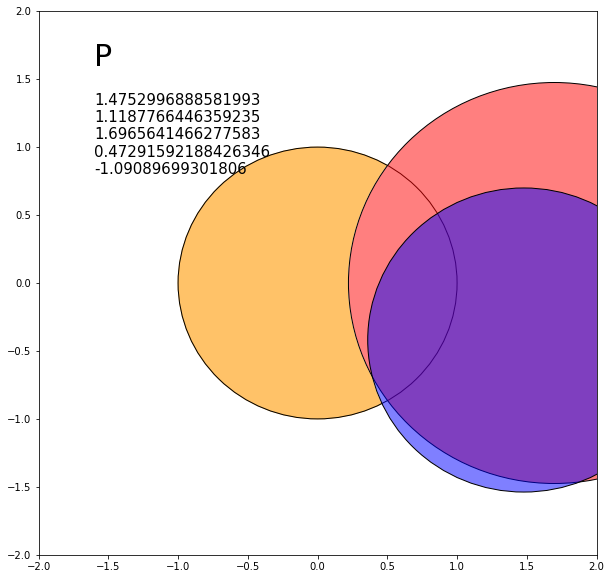

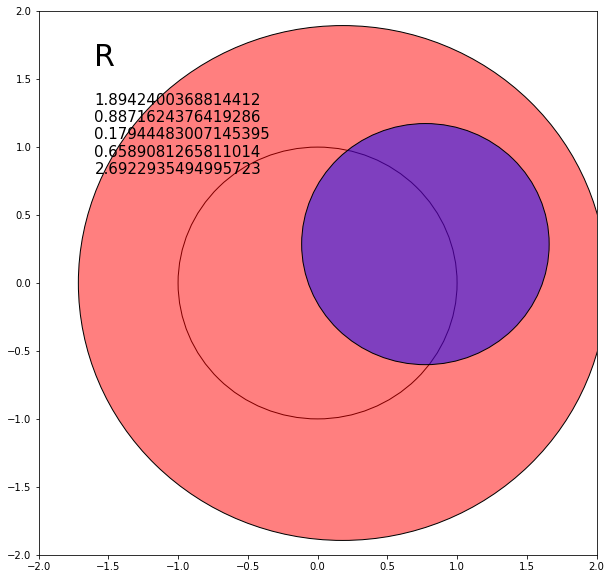

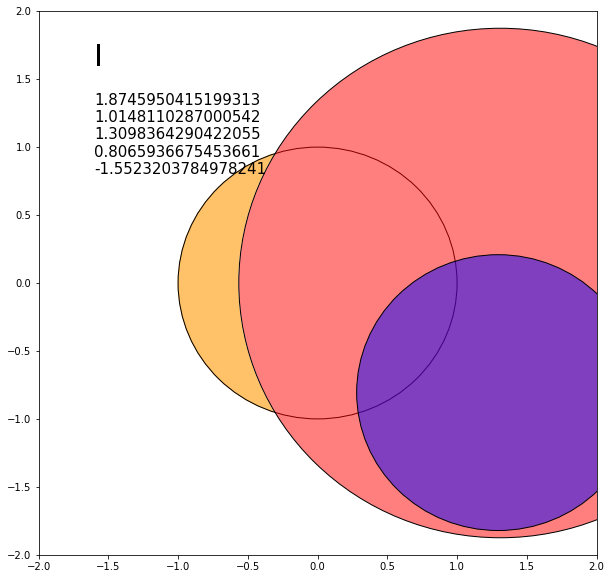

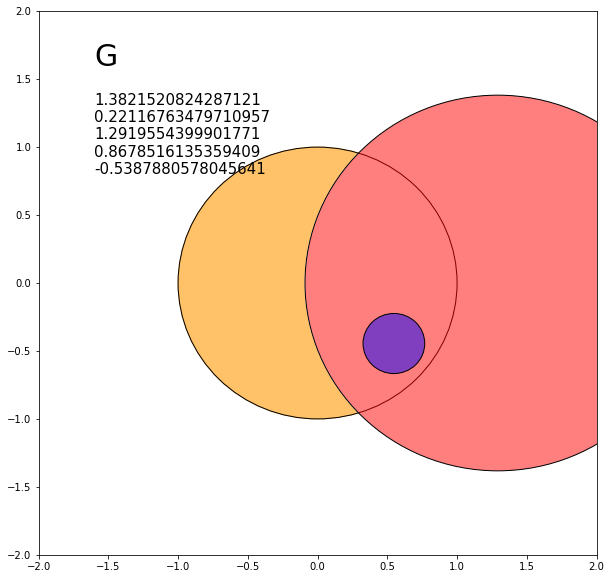

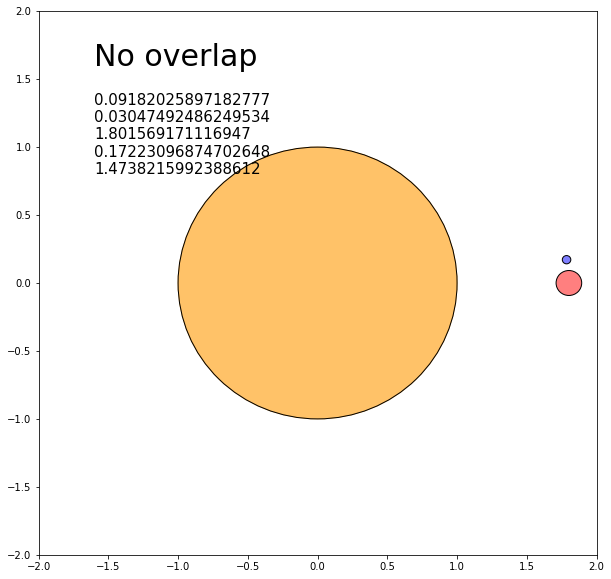

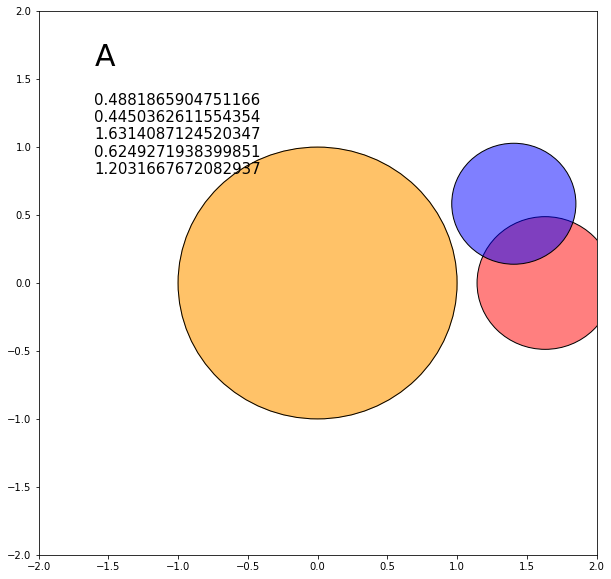

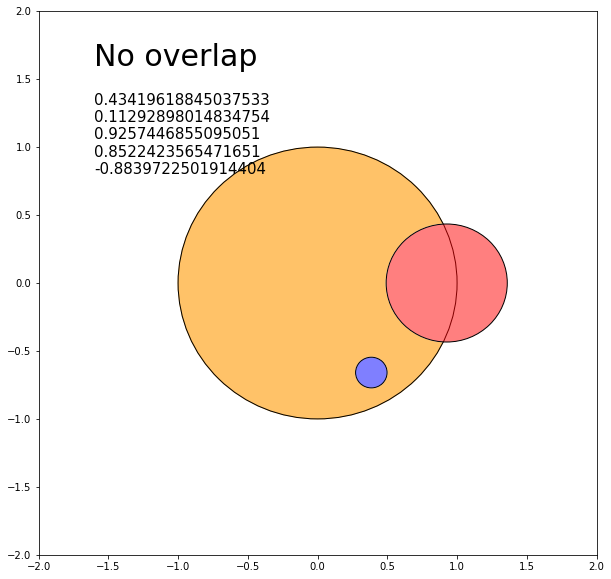

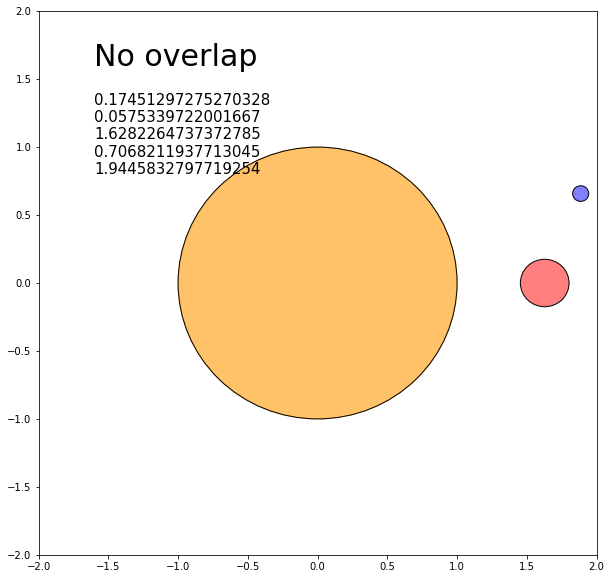

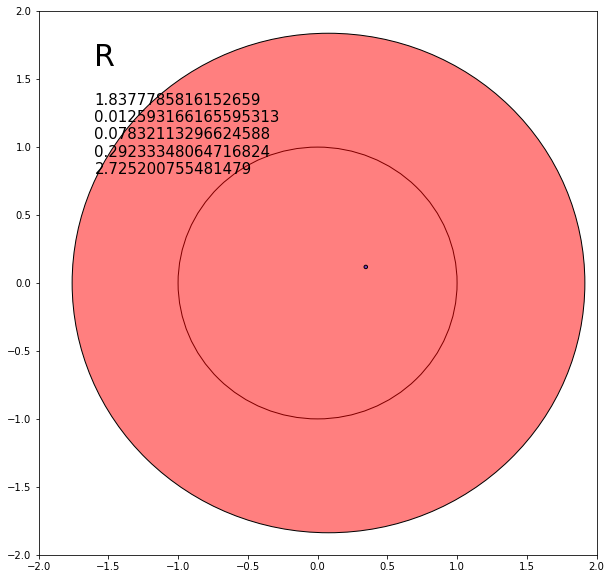

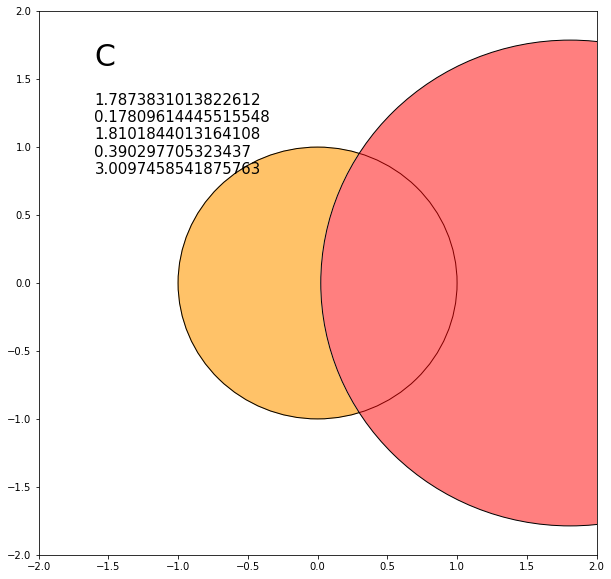

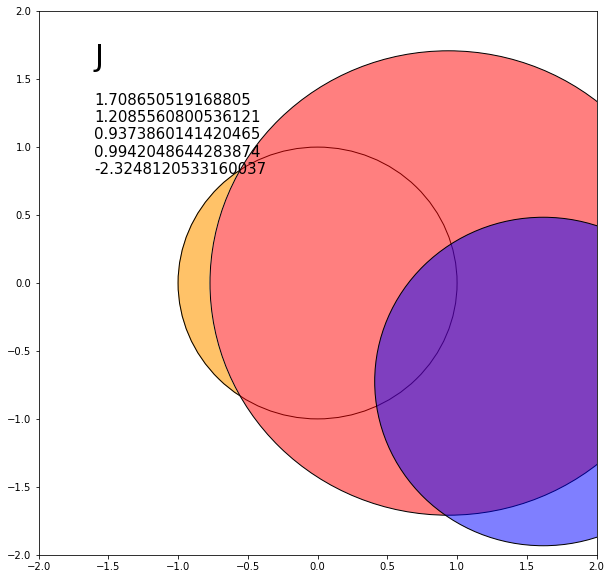

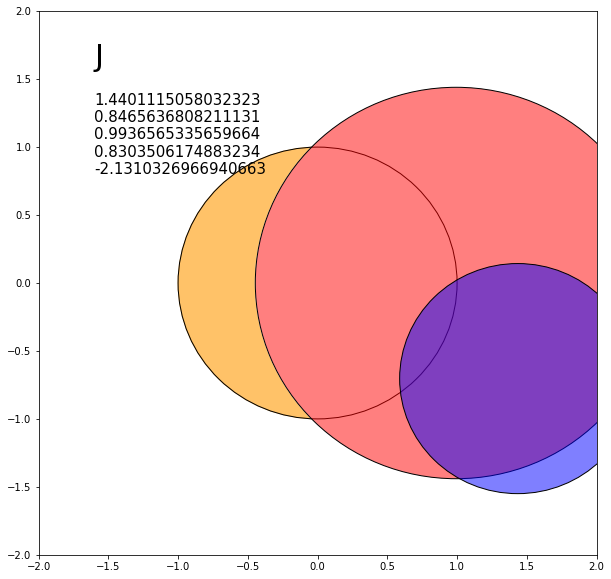

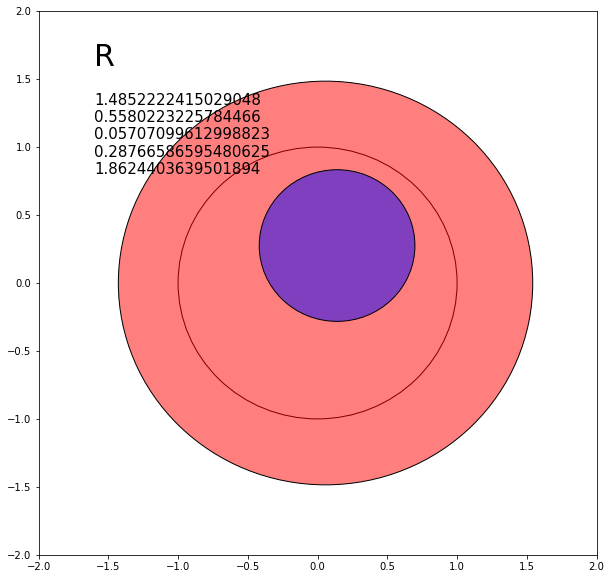

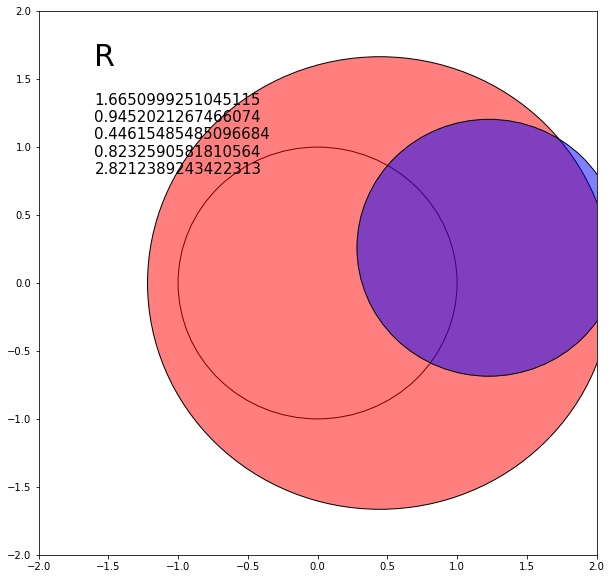

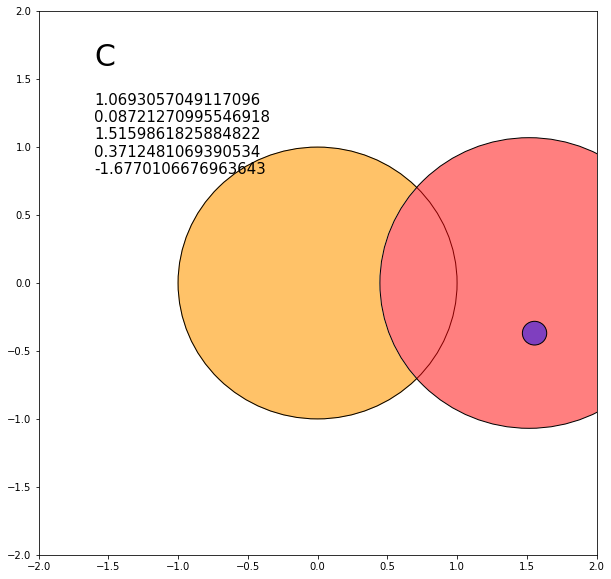

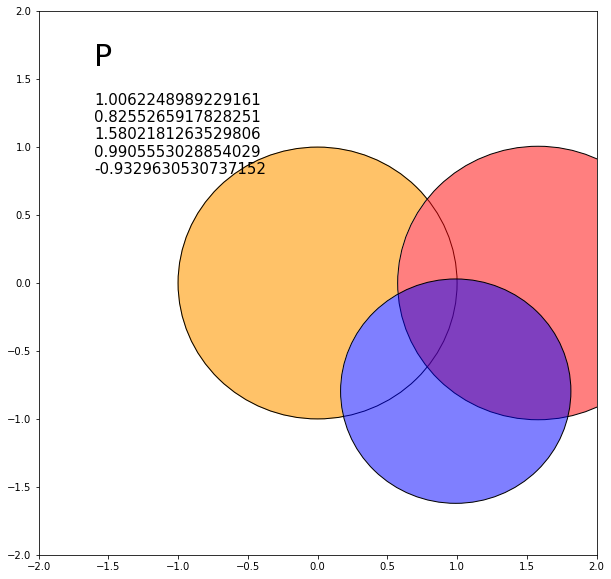

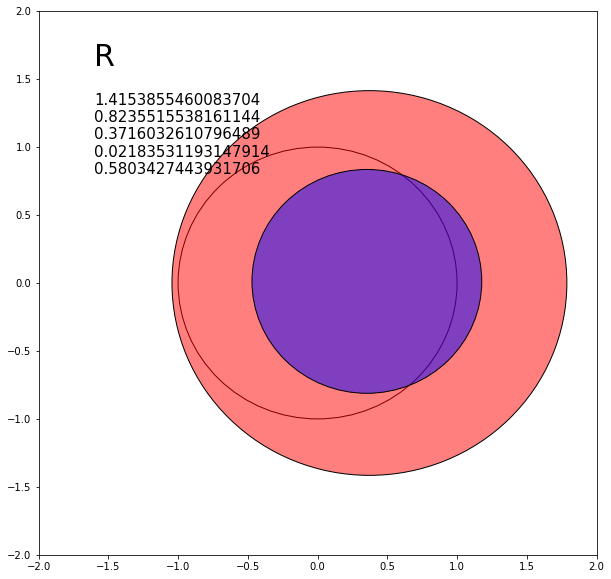

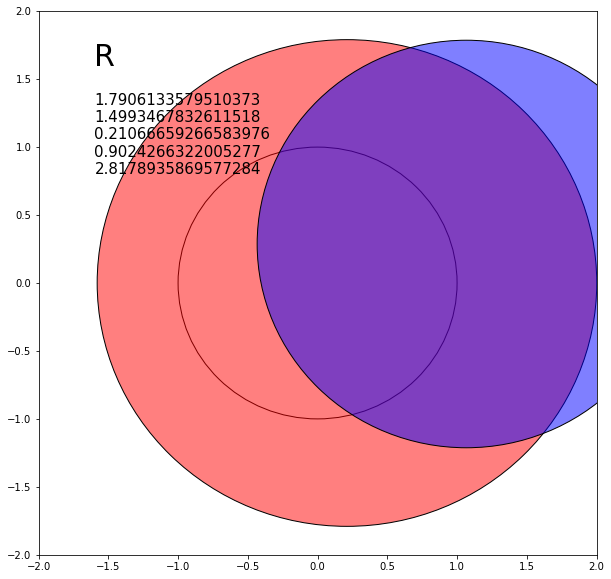

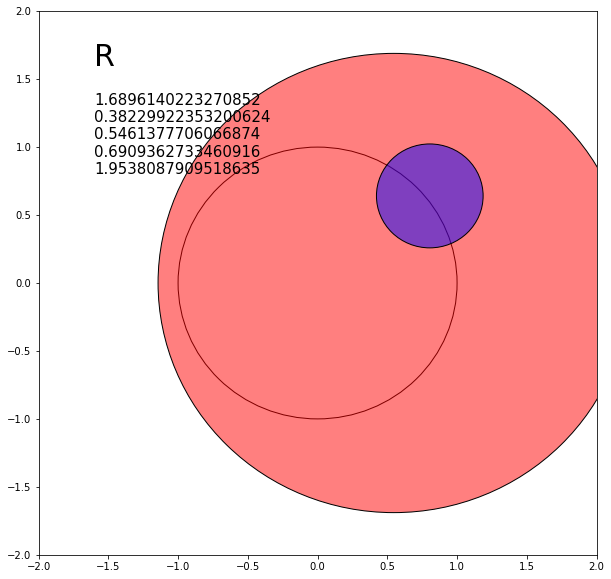

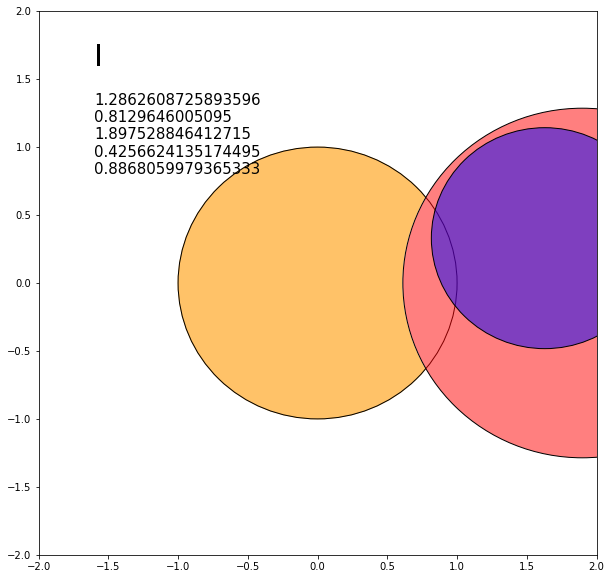

In [197]:
for i in range(100):
    rp = np.random.rand() * 2.0
    rm = np.random.rand() * rp
    bp = np.random.rand() * 2.0
    bpm = np.random.rand()
    theta = np.random.rand() * 2 * np.pi - np.pi
    draw(rp, rm, bp, bpm, theta)

In [88]:
np.random.rand()

0.5608832535312428